In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Bidirectional
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import math
from datetime import datetime
from tqdm import tqdm
print(f'Current Step #01 [now = {datetime.now()}')
import matplotlib.pyplot as plt

title = "Numbers"
row_length = 150
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 30
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}
# 1179 3,16,18,24,40,44+21. 

Current Step #01 [now = 2025-07-08 14:46:45.272378


In [4]:
from IPython.display import Markdown
# Define a variable
# Display the variable's value in Markdown
contents = f"### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str
Markdown(contents)

row's len = 150


### Numbers
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1180|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
|1151|02,03,09,15,27,29|8|85|3|1|2|0|0|

In [5]:
#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

In [45]:
def draw_markdown(rows: list):
    from IPython.display import Markdown
    # Define a variable
    # Display the variable's value in Markdown
    table_header = "|title|content|"
    table_sep = "|--|--|"
    table_rows = [table_header,
                  table_sep,
                  ]
    for row in rows:
        table_rows.append(f"|{row[0]}|{row[1]}|")
    table_rows_str = "\n".join(table_rows)
    Markdown(table_rows_str)
    for row in rows:
        print(f'{row[0]:12s} = {row[1]}')


def draw_graph(X, title):
    print(X)
    y = [i for i in range(len(X))]
    plt.figure(figsize=(12, 6))
    plt.plot(y, X, label='Nums')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    plt.legend()
    plt.show()


def draw_scatter(Y: list, title, show_line=True, show_dot=True, show_cols=[0], ext_datas=[], show_label=True, helper_line_nums=[], marker_size=3):
    plt.figure(figsize=(12, 6))
    colors=['b', 'g', 'r', 'c', 'm', 'y']
    if show_line == False and show_dot == False:
        show_line = True
    last = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[]}
    
    # draw helper line
    for helper_line_num in helper_line_nums:
        helper_line = [helper_line_num for i in range(len(Y[0]))]
        X = [i for i in range(len(Y[0]))]
        plt.plot(X, helper_line, color="tab:gray")

    for show_col in show_cols:
        if show_col < len(Y):
            if show_label:
                label = f'Nums{show_col}'            
            else:
                label = ""
            X = [i for i in range(len(Y[show_col]))]
            if show_line:
                plt.plot(X, Y[show_col], label=label, color=colors[show_col])
                label = ""
            if show_dot:
                plt.plot(X, Y[show_col], marker='o', markersize=marker_size, color = colors[show_col], label=label)
        # print(f'show_col = {show_col}')
        # print(f'         = {Y[show_col][-1:][0]}')
        last[show_col].append(Y[show_col][-1:][0])
    if len(ext_datas) > 0:
        for ext in ext_datas:
            if ext[0] < 6 and ext[0] in last:
                show_col = ext[0]
                last[show_col].append(ext[1])
                loc = np.arange(len(Y[0])-1, len(Y[0]) + len(last[show_col])-1)
                if show_line:
                    plt.plot(loc, last[show_col], color='k')
                if show_dot:
                    plt.plot(loc, last[show_col], marker='o', markersize=marker_size, color='k')
    plt.xlabel('rounds')
    plt.ylabel('selected')
    plt.title(title)
    if show_label:
        plt.legend()
    plt.show()


def get_pre_bef(nums, wanted_num):
    results = []
    for pos in range(len(nums)):
        parts = []
        if nums[pos] == wanted_num:
            if pos > 0 and pos < (len(nums) - 1 ):
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos == 0 and pos < (len(nums) - 1 ):
                parts.append(-1)
                parts.append(nums[pos])
                parts.append(nums[pos+1])
            if pos >= (len(nums) - 1 ) and pos > 0:
                parts.append(nums[pos-1])
                parts.append(nums[pos])
                parts.append(-1)
            results.append(parts)
    return results
            

def draw_average(my_list, length, selected, helper_line_nums=[10,20,30,40], show_diff=False):
    print(f'{"_"*40}')
    averages = []
    metrics = []
    show_cols = [0]
    for i in range(len(my_list) - length + 1):
        item_part = my_list[i: i+length]
        average = np.mean(item_part)
        averages.append(float(average))
    metrics.append(averages)
    ordered = averages.copy()
    ordered.sort()
    draw_markdown([('최소값',f'{ordered[0:5]}'),
                   ('마지막',f'{averages[-5:]}')
                  ])
    if show_diff:
        diff = [0] + [averages[i] - averages[i-1] for i in range(1, len(averages))]
        metrics.append(diff)
        show_cols.append(1)
    draw_scatter(metrics, f'average : {selected+1} {length}', True, True, show_cols=show_cols, helper_line_nums=helper_line_nums)


def get_frequency(datas):
    """ get_frequency """
    # datas = my_list.copy()
    # datas.sort()
    ordered_dict = {}
    for key in datas:
        if key not in ordered_dict:
            ordered_dict[key] = 1
        else:
            ordered_dict[key] += 1
    ordered_dict_sorted = sorted(ordered_dict.items(), key=lambda item: item[1])
    return ordered_dict_sorted


def get_information(selected, ext_data, wanted_data_length, helper_line_nums_1, helper_line_nums_2, show_diff=False, lengths=[5,8,10,13,15], start_pos_0=0, start_pos_1=0):
    """ get_information """
    length = 8
    if start_pos_0 > len(row_list_none_last[selected]):
        start_pos_0 = 0
    if start_pos_1 > len(row_list_none_last[selected]):
        start_pos_1 = 0
    draw_scatter([row_list_none_last[selected][start_pos_0:]],
                 f'Line Num : {selected+1}',
                 True, True,
                 [0],
                 [(0,ext_data)],
                 helper_line_nums=helper_line_nums_1)
    # print(f'start_pos_0 = {start_pos_0}')
    # print(f'start_pos_1 = {start_pos_1}')
    my_list = row_list_none_last[selected][start_pos_1:] + [ext_data]
    last_num = row_list_none_last[selected][-1:][0]
    ordered = my_list.copy()
    ordered.sort()
    ordered = list(set(ordered))
    freq_parts = get_frequency(my_list)
    freq_all = get_frequency(row_list_none_last[selected])
    pre_bef = get_pre_bef(row_list_none_last[0], last_num)
    draw_markdown([
        ('최소 값',f'{ordered[:wanted_data_length]}'),
        ('최대 값',f'{ordered[-wanted_data_length:]}'),
        ('사용자 선택',f'{ext_data}'),
        ('마지막 값',f'{last_num}'),
        ('마지막 값들',f'{row_list_none_last[selected][-wanted_data_length:]}'),
        ('자주 나오는 값(부분)',f'{freq_parts[-wanted_data_length:]}'),
        ('자주 나오는 값(전체)',f'{freq_all[-wanted_data_length:]}'),
        ('마지막 수의 앞과 뒤',f'{pre_bef}')
    ]
    )
    for length in lengths:
        draw_average(my_list, length=length, selected=selected, helper_line_nums=helper_line_nums_2, show_diff=show_diff)


class DataScaling():
    def __init__(self):
        # self._scaler_cls = MinMaxScaler()
        self._scaler_cls = StandardScaler()

    def fit_transform(self, data):
        return self._scaler_cls.fit_transform(data)

    def inverse_transform(self, datas: list):
        inversed_data = []
        cnt = 1
        for data in datas:
            # print(data[0])
            cnt += 1
            if data[1] == True:
                inversed = self._scaler_cls.inverse_transform(data[0].reshape(-1, 1))
            else:
                inversed = self._scaler_cls.inverse_transform(data[0])
            inversed_data.append(inversed)
        return inversed_data


def analyze_v1(random_state,
               row_data,
               layer_count=3,
               activation='sigmoid',
               units=50,
               epochs=50,
               batch_size=1,
               draw_graph=True,
               sequence_length=10,
               train_ratio=0.85,
               verbose=0):
    # 1. Prepare the Data
    # Create sample time series data
    df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
    if verbose > 1:
        print('df', df)
    if verbose > 1:
        print(f'Current Step #02 [now = {datetime.now()}]')

    data = df['matched_cnts'].values.reshape(-1, 1)

    # Normalize the data
    scaler = DataScaling()
    scaled_data = scaler.fit_transform(data)
    if verbose > 1:
        print(f'Current Step #04 [now = {datetime.now()}]')

    # Define sequence length (timesteps)

    # Create sequences for training
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:i + sequence_length, 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    if verbose > 1:
        print(f'Current Step #06 [now = {datetime.now()}]')

    # Reshape X for LSTM input (samples, timesteps, features)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    if verbose > 1:
        print(f'Current Step #08 [now = {datetime.now()}]')

    # Split data into training and testing sets
    train_size = int(len(X) * train_ratio)

    X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
    y_train, y_test = y[:train_size], y[train_size:]
    if verbose > 1:
        print(f'Current Step #10 [now = {datetime.now()}]')

    tf.random.set_seed(random_state)

    # 2. Build the LSTM Model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], 1)))
    # model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    for i in range(layer_count):
        model.add(LSTM(units=units, return_sequences=True, activation=activation))
    model.add(LSTM(units=units, activation=activation))
    model.add(Dense(units=1)) # Output layer for predicting a single value
    if verbose > 1:
        print(f'Current Step #12 [now = {datetime.now()}]')

    # 3. Compile and Train the Model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    if verbose > 1:
        print(f'Current Step #14 [now = {datetime.now()}]')
    # 4. Make Predictions
    train_predict = model.predict(X_train, verbose=verbose)
    test_predict = model.predict(X_test, verbose=verbose)
    last_predict = model.predict(X_last, verbose=verbose)
    if verbose > 0:
        print(f'Current Step #16 [now = {datetime.now()}]')

    # Inverse transform predictions to original scale
    scaled_data1 = scaled_data
    wanted_datas = [(train_predict, False),
                    (test_predict, False),
                    (last_predict, True),
                    (y_train, True),
                    (y_test, True),
                    (scaled_data, False)]
    inversed_datas = scaler.inverse_transform(wanted_datas)
    train_predict = inversed_datas[0]
    test_predict = inversed_datas[1]
    last_predict = inversed_datas[2]
    y_train_original = inversed_datas[3]
    y_test_original = inversed_datas[4]
    scaled_data = inversed_datas[5]

    if verbose > 1:
        print(f'Current Step #18 [now = {datetime.now()}]')

    # 5. Evaluate the Model (Optional, but recommended)
    from sklearn.metrics import mean_squared_error
    train_rmse = np.sqrt(mean_squared_error(y_train_original, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test_original, test_predict))

    if verbose > 0:
        print(f'Current Step #20 [now = {datetime.now()}]')
        print(f"Train RMSE: {train_rmse}")
        print(f"Test RMSE: {test_rmse}")
        print(f'random_state = {random_state}')
        print(f'last_prediction = {last_predict}')
        print(f'data_max_val = {scaled_data.max()}')
    # You can also visualize the results
    if draw_graph:
        # import matplotlib.pyplot as plt
        plt.figure(figsize=(12, 6))
        plt.plot(scaled_data, label='Original Data')
        plt.plot(np.arange(sequence_length,
                           sequence_length + len(train_predict)),
                 train_predict,
                 label='Train Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict),
                           sequence_length + len(train_predict) + len(test_predict)),
                 test_predict,
                 label='Test Predictions')
        plt.plot(np.arange(sequence_length + len(train_predict) + len(test_predict),
                       sequence_length + len(train_predict) + len(test_predict) + len(last_predict)),
                 last_predict,
                 label='Last Predictions')
        plt.xlabel(f'{random_state}\'s Time Step')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
    return scaled_data.max(), last_predict, random_state


print(f'Current work : {datetime.now()}')

Current work : 2025-07-08 15:46:53.456768


In [ ]:
## this code was run.
#!pip install keras-tuner

In [96]:
### sum

from tensorflow import keras
from kerastuner.tuners import BayesianOptimization

## data preparation
row_data = sums[:-1]
train_ratio = 0.85
sequence_length = 10
df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
data = df['matched_cnts'].values.reshape(-1, 1)
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(f'Current Step #04 [now = {datetime.now()}]')
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])
X, y = np.array(X), np.array(y)
print(f'Current Step #06 [now = {datetime.now()}]')
# Reshape X for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(f'Current Step #08 [now = {datetime.now()}]')
# Split data into training and testing sets
train_size = int(len(X) * train_ratio)
X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
y_train, y_test = y[:train_size], y[train_size:]


n_input = X_train.shape[1]


def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(n_input, 1)))    
    # model.add(LSTM(units=hp.Int('units',min_value=32,
    #                                 max_value=512,
    #                                 step=32),
    #                activation='tanh',
    #                input_shape=(n_input, 1)))
    model.add(LSTM(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32),
                   return_sequences=True,
                   activation='tanh'))    
    model.add(Dense(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))
    return model

bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=20,
    # executions_per_trial=1,
    # directory=os.path.normpath('C:/keras_tuning'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)



n_epochs = 50

bayesian_opt_tuner.search(X_train,
                          y_train,
                          epochs=n_epochs,
                          # validation_data=(X_test, y_test),
                          validation_split=0.2,
                          verbose=1)

bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]

print(model.summary())

run_this_01=False
if run_this_01:
    print('start', datetime.now())
    scaled_data_max, last_predict, random_state = analyze_v1(random_state=31455800,
                                                             row_data=sums[:-1],
                                                             layer_count=5,
                                                             activation='tanh',
                                                             units=50,
                                                             epochs=100,
                                                             batch_size=1,
                                                             draw_graph=True,
                                                             sequence_length=25,
                                                             train_ratio=0.97,
                                                             verbose=1)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
"""
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted =  [[[0.0177222]]] [[138.97337]]
"""

Trial 20 Complete [00h 00m 11s]
mse: 0.8988957405090332

Best mse So Far: 0.8988626599311829
Total elapsed time: 00h 03m 36s


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10, 32)         │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [104]:
### line 1
import os
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
selected = 0
## data preparation
row_data = row_list_none_last[selected][:-1]
train_ratio = 0.85
sequence_length = 10
df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
data = df['matched_cnts'].values.reshape(-1, 1)
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(f'Current Step #04 [now = {datetime.now()}]')
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])
X, y = np.array(X), np.array(y)
print(f'Current Step #06 [now = {datetime.now()}]')
# Reshape X for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(f'Current Step #08 [now = {datetime.now()}]')
# Split data into training and testing sets
train_size = int(len(X) * train_ratio)
X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
y_train, y_test = y[:train_size], y[train_size:]


n_input = X_train.shape[1]


def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(n_input, 1)))    
    model.add(LSTM(units=hp.Int('units',
                                min_value=32,
                                max_value=512,
                                step=32),
                   return_sequences=True,
                   activation='tanh'))
    model.add(LSTM(units=hp.Int('units',
                                min_value=32,
                                max_value=512,
                                step=32), activation="tanh"))
    model.add(Dense(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))
    return model

bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=20,
    # executions_per_trial=1,
    directory=os.path.normpath('./models'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)



n_epochs = 50

bayesian_opt_tuner.search(X_train,
                          y_train,
                          epochs=n_epochs,
                          # validation_data=(X_test, y_test),
                          validation_split=0.2,
                          verbose=1)

bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]

print(model.summary())

run_this_01=False
if run_this_01:
    print('start', datetime.now())
    scaled_data_max, last_predict, random_state = analyze_v1(random_state=31455800,
                                                             row_data=sums[:-1],
                                                             layer_count=5,
                                                             activation='tanh',
                                                             units=50,
                                                             epochs=100,
                                                             batch_size=1,
                                                             draw_graph=True,
                                                             sequence_length=25,
                                                             train_ratio=0.97,
                                                             verbose=1)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
"""
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted =  [[[0.0177222]]] [[138.97337]]
"""

Trial 20 Complete [00h 00m 09s]
mse: 0.15836749970912933

Best mse So Far: 0.043832700699567795
Total elapsed time: 00h 03m 44s


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,761 (53.75 KB)

 Trainable params: 13,761 (53.75 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
predicted =  [[0.24325629]] [[8.779058]]


'\n1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step\npredicted =  [[[0.0177222]]] [[138.97337]]\n'

In [105]:
### line 2
import os
from tensorflow import keras
from kerastuner.tuners import BayesianOptimization
selected = 1
## data preparation
row_data = row_list_none_last[selected][:-1]
train_ratio = 0.85
sequence_length = 10
df = pd.DataFrame(zip(row_data), columns=['matched_cnts'])
data = df['matched_cnts'].values.reshape(-1, 1)
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(f'Current Step #04 [now = {datetime.now()}]')
X, y = [], []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i + sequence_length, 0])
    y.append(scaled_data[i + sequence_length, 0])
X, y = np.array(X), np.array(y)
print(f'Current Step #06 [now = {datetime.now()}]')
# Reshape X for LSTM input (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
print(f'Current Step #08 [now = {datetime.now()}]')
# Split data into training and testing sets
train_size = int(len(X) * train_ratio)
X_train, X_test, X_last = X[:train_size], X[train_size:], np.array([[y[-1:]]])
y_train, y_test = y[:train_size], y[train_size:]


n_input = X_train.shape[1]


def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(n_input, 1)))    
    model.add(LSTM(units=hp.Int('units',
                                min_value=32,
                                max_value=512,
                                step=32),
                   return_sequences=True,
                   activation='tanh'))
    model.add(LSTM(units=hp.Int('units',
                                min_value=32,
                                max_value=512,
                                step=32), activation="tanh"))
    model.add(Dense(units=hp.Int('units',min_value=32,
                                    max_value=512,
                                    step=32), activation='tanh'))
    model.add(Dense(1))
    model.compile(loss='mse', metrics=['mse'], optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate',
                  values=[1e-2, 1e-3, 1e-4])))
    return model

bayesian_opt_tuner = BayesianOptimization(
    build_model,
    objective='mse',
    max_trials=20,
    # executions_per_trial=1,
    directory=os.path.normpath('./models'),
    project_name='kerastuner_bayesian_poc',
    overwrite=True)



n_epochs = 50

bayesian_opt_tuner.search(X_train,
                          y_train,
                          epochs=n_epochs,
                          # validation_data=(X_test, y_test),
                          validation_split=0.2,
                          verbose=1)

bayes_opt_model_best_model = bayesian_opt_tuner.get_best_models(num_models=1)
model = bayes_opt_model_best_model[0]

print(model.summary())

run_this_01=False
if run_this_01:
    print('start', datetime.now())
    scaled_data_max, last_predict, random_state = analyze_v1(random_state=31455800,
                                                             row_data=sums[:-1],
                                                             layer_count=5,
                                                             activation='tanh',
                                                             units=50,
                                                             epochs=100,
                                                             batch_size=1,
                                                             draw_graph=True,
                                                             sequence_length=25,
                                                             train_ratio=0.97,
                                                             verbose=1)
predicted = model.predict(X_last)
scaled_predicted = scaler.inverse_transform(predicted.reshape(-1, 1))
print('predicted = ', predicted, scaled_predicted)
"""
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted =  [[[0.0177222]]] [[138.97337]]
"""

Trial 20 Complete [00h 00m 11s]
mse: 0.02569165825843811

Best mse So Far: 0.005674651823937893
Total elapsed time: 00h 04m 20s


/opt/conda/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,785 (839.00 KB)

 Trainable params: 214,785 (839.00 KB)

 Non-trainable params: 0 (0.00 B)

None
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
predicted =  [[0.6582607]] [[17.767733]]


'\n1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step\npredicted =  [[[0.0177222]]] [[138.97337]]\n'

In [106]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,785 (839.00 KB)

 Trainable params: 214,785 (839.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()


##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

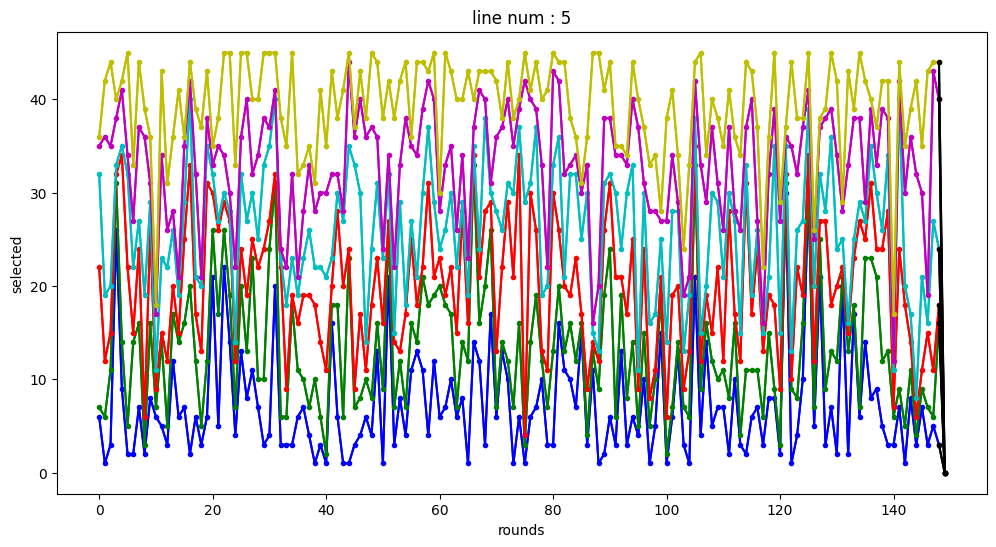

In [11]:
ext_datas = []
for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
show_cols = [0, 1, 2, 3, 4, 5]

show_label = False


draw_scatter(row_list, f'line num : {key}', True, True, show_cols, ext_datas, show_label)


start 2025-07-08 17:16:37.522960
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
Current Step #16 [now = 2025-07-08 17:18:47.282085]
Current Step #20 [now = 2025-07-08 17:18:47.284063]
Train RMSE: 29.681052921695915
Test RMSE: 22.309767369670453
random_state = 31455800
last_prediction = [[138.19798]]
data_max_val = 220.0


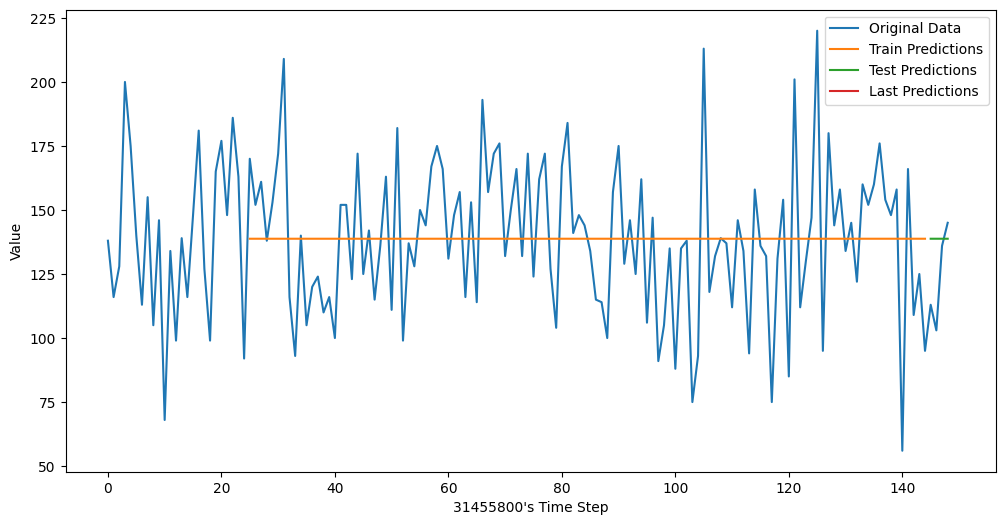

220.0 [[138.19798]] 31455800


In [78]:
run_this_01=True
if run_this_01:
    print('start', datetime.now())
    scaled_data_max, last_predict, random_state = analyze_v1(random_state=31455800,
                                                             row_data=sums[:-1],
                                                             layer_count=5,
                                                             activation='tanh',
                                                             units=50,
                                                             epochs=100,
                                                             batch_size=1,
                                                             draw_graph=True,
                                                             sequence_length=25,
                                                             train_ratio=0.97,
                                                             verbose=1)
    
    # scaled_data_max, last_predict, random_state = analyze_v1(random_state=314558,
    #                                                          row_data=sums[:-1],
    #                                                          layer_count=2,
    #                                                          activation='tanh',
    #                                                          units=25,
    #                                                          epochs=50,
    #                                                          batch_size=1,
    #                                                          draw_graph=True,
    #                                                          sequence_length=30,
    #                                                          train_ratio=0.97,
    #                                                          verbose=1)
    print(scaled_data_max, last_predict, random_state)

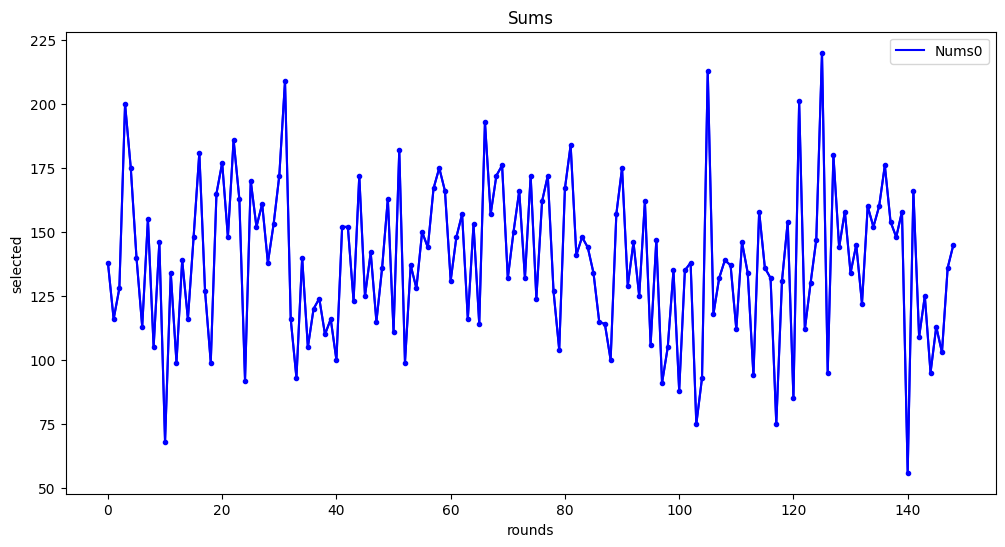

last : [56, 166, 109, 125, 95, 113, 103, 136, 145]


In [21]:
draw_scatter([sums[:-1]] + [sum(candidate.values())], f'Sums')
print(f'last : {sums[-10:-1]}')

In [ ]:
run_this_02=False
if run_this_02:
    predicted = []
    for selected in range(6):
        print(f'selected = {selected}')
        my_list = row_list_none_last[selected]
        scaled_data_max, last_predict, random_state = analyze_v1(random_state=314558,
                                                                 row_data=my_list,
                                                                 layer_count=3,
                                                                 activation='sigmoid',
                                                                 units=50,
                                                                 draw_graph=False,
                                                                 sequence_length=10,
                                                                 verbose=2)
        predicted.append((scaled_data_max, last_predict, random_state))
    for p in predicted:
        print(p)

In [ ]:
run_this_03=False
if run_this_03:
    predicted = []
    for selected in range(6):
        print(f'selected = {selected}')
        my_list = row_list_none_last[selected]
        scaled_data_max, last_predict, random_state = analyze_v1(random_state=314558,
                                                                 row_data=my_list,
                                                                 layer_count=3,
                                                                 activation='sigmoid',
                                                                 units=50,
                                                                 draw_graph=False,
                                                                 sequence_length=10,
                                                                 verbose=2)
        predicted.append((scaled_data_max, last_predict, random_state))
    for p in predicted:
        print(p)

In [ ]:
run_this_04=False
if run_this_04:
    predicted = []
    for selected in range(6):
        print(f'selected = {selected}')
        my_list = row_list_none_last[selected][:-1]
        scaled_data_max, last_predict, random_state = analyze_v1(random_state=314558,
                                                                 row_data=my_list,
                                                                 layer_count=3,
                                                                 activation='sigmoid',
                                                                 units=50,
                                                                 draw_graph=False,
                                                                 sequence_length=10,
                                                                 verbose=2)
        predicted.append((scaled_data_max, last_predict, random_state))
    for p in predicted:
        print(p)

In [ ]:
run_this_05=False
if run_this_05:
    print(datetime.now())
    predicted = []
    for selected in range(6):
        print(f'selected = {selected}')
        my_list = row_list_none_last[selected][:-1]
        scaled_data_max, last_predict, random_state = analyze_v1(random_state=30014558,
                                                                 row_data=my_list,
                                                                 layer_count=1,
                                                                 activation='tanh',
                                                                 units=6,
                                                                 draw_graph=False,
                                                                 sequence_length=10,
                                                                 verbose=2)
        predicted.append((scaled_data_max, last_predict, random_state))
    for p in predicted:
        print(p)

In [ ]:
(np.float64(30.000000000000004), array([[6.1207676]], dtype=float32), 314558)
(np.float64(33.0), array([[4.0026402]], dtype=float32), 314558)
(np.float64(35.0), array([[15.271533]], dtype=float32), 314558)
(np.float64(40.0), array([[29.240566]], dtype=float32), 314558)
(np.float64(44.0), array([[37.42968]], dtype=float32), 314558)
(np.float64(45.0), array([[32.72621]], dtype=float32), 314558)

(np.float64(30.0), array([[7.3217187]], dtype=float32), 314558)
(np.float64(33.0), array([[13.810979]], dtype=float32), 314558)
(np.float64(35.0), array([[19.010557]], dtype=float32), 314558)
(np.float64(40.0), array([[25.239151]], dtype=float32), 314558)
(np.float64(44.0), array([[34.730366]], dtype=float32), 314558)
(np.float64(45.0), array([[38.54149]], dtype=float32), 314558)

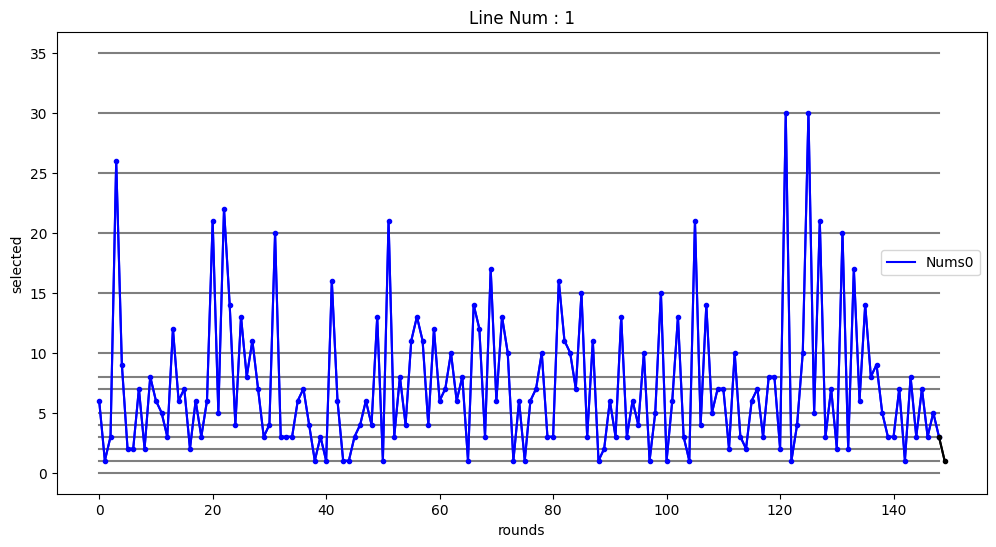

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 26, 30]
사용자 선택       = 1
마지막 값        = 3
마지막 값들       = [8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3]
자주 나오는 값(부분) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 8), (2, 10), (4, 10), (7, 13), (1, 16), (6, 18), (3, 25)]
자주 나오는 값(전체) = [(26, 1), (22, 1), (9, 2), (20, 2), (16, 2), (17, 2), (15, 2), (30, 2), (12, 3), (21, 4), (14, 4), (11, 5), (13, 6), (5, 7), (10, 7), (8, 8), (2, 10), (4, 10), (7, 13), (1, 15), (6, 18), (3, 25)]
마지막 수의 앞과 뒤  = [[1, 3, 26], [5, 3, 12], [6, 3, 6], [7, 3, 4], [20, 3, 3], [3, 3, 3], [3, 3, 6], [1, 3, 1], [1, 3, 4], [21, 3, 8], [12, 3, 17], [10, 3, 3], [3, 3, 16], [15, 3, 11], [6, 3, 13], [13, 3, 6], [13, 3, 1], [10, 3, 2], [7, 3, 8], [2

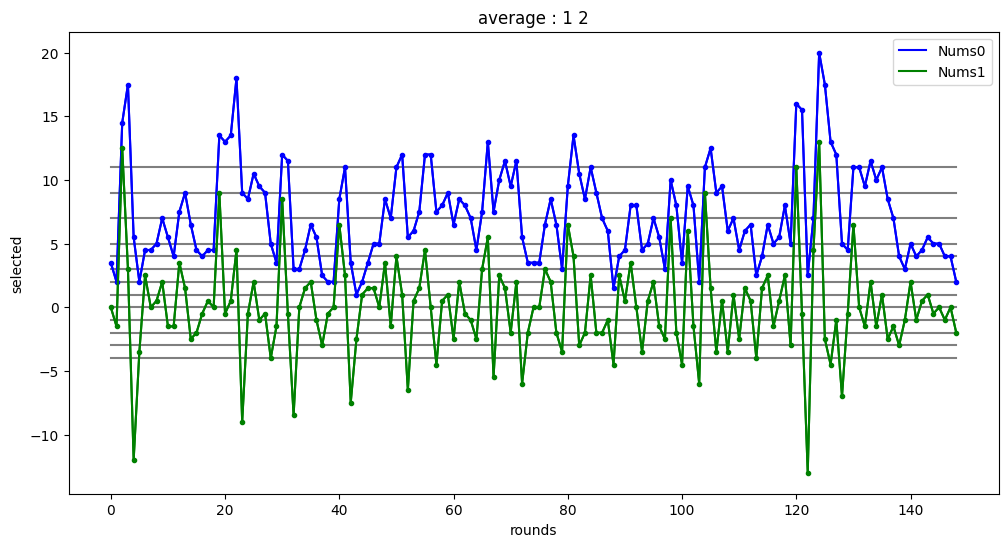

________________________________________
최소값          = [3.0, 3.0, 3.2, 3.6, 3.8]
마지막          = [5.2, 4.4, 5.2, 4.2, 3.8]


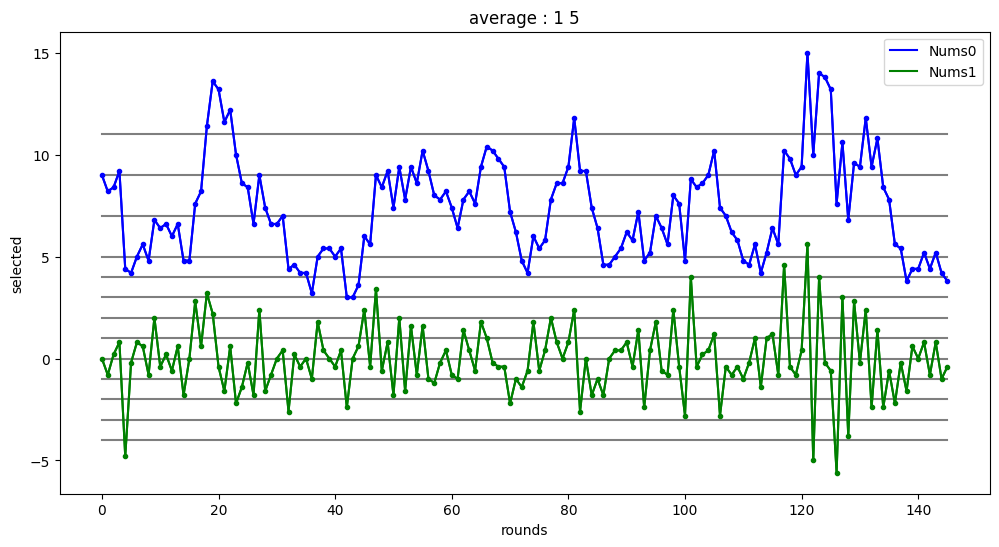

________________________________________
최소값          = [3.5, 3.75, 3.875, 4.0, 4.125]
마지막          = [4.625, 4.375, 4.625, 4.625, 3.875]


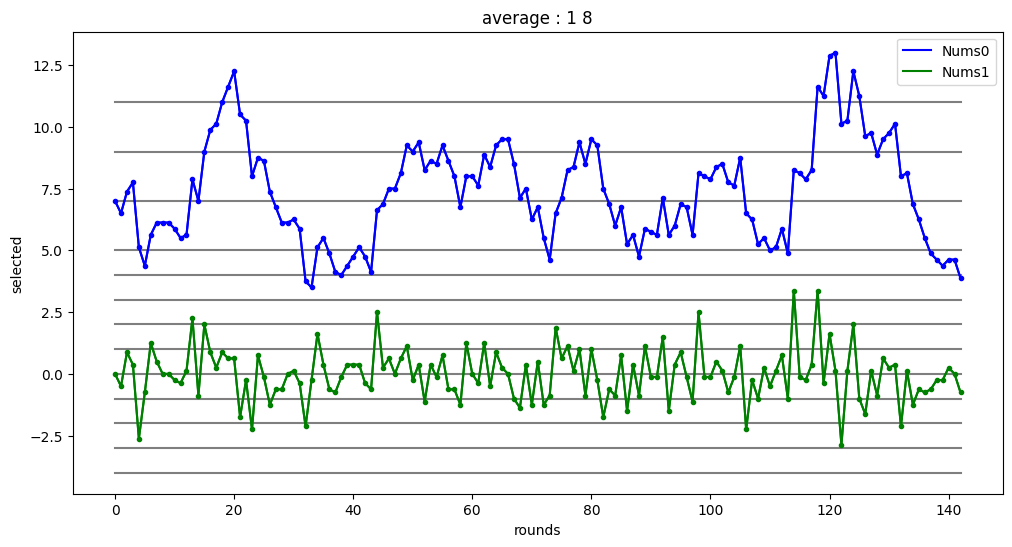

________________________________________
최소값          = [4.0, 4.1, 4.2, 4.3, 4.3]
마지막          = [5.4, 4.9, 4.5, 4.3, 4.1]


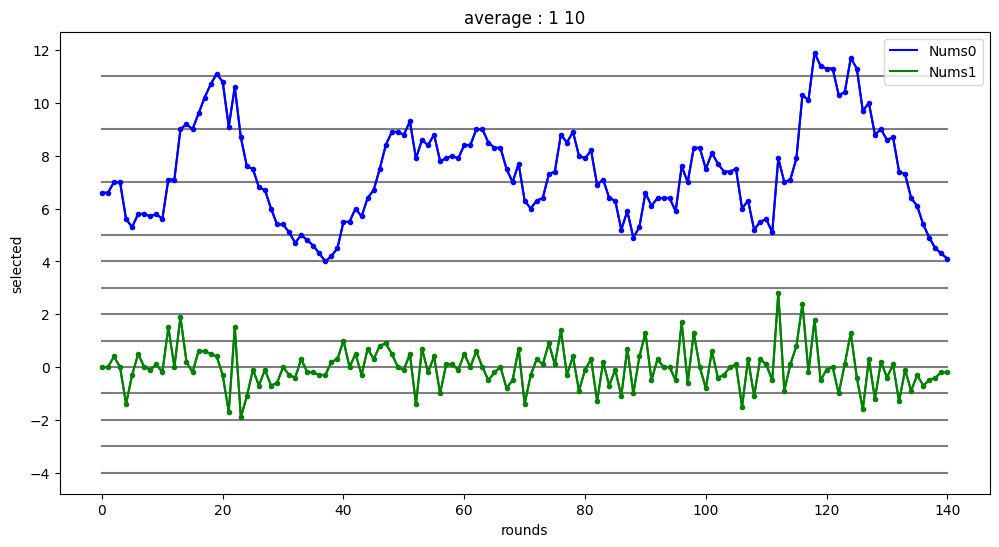

________________________________________
최소값          = [4.230769230769231, 4.230769230769231, 4.3076923076923075, 4.384615384615385, 4.461538461538462]
마지막          = [7.0, 5.923076923076923, 5.846153846153846, 5.0, 4.461538461538462]


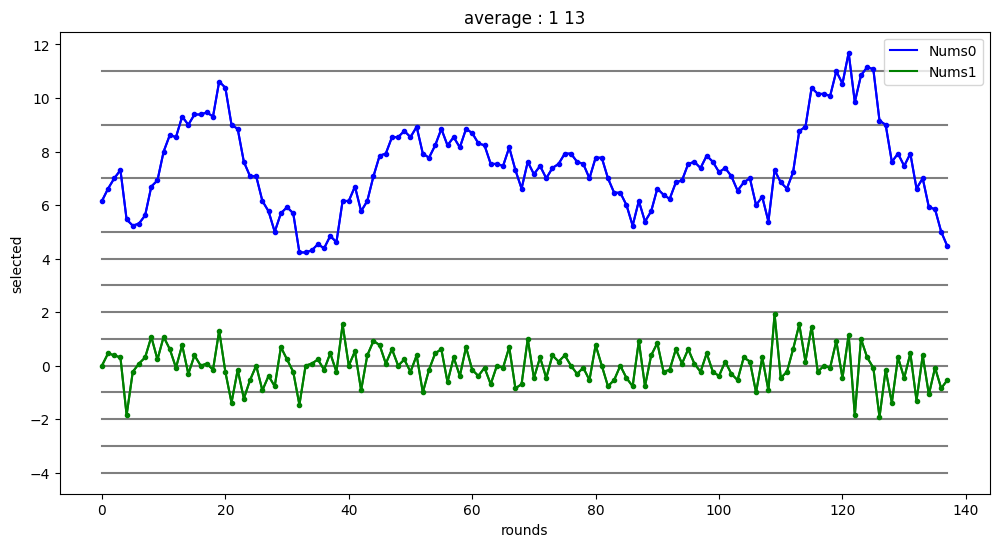

________________________________________
최소값          = [4.133333333333334, 4.333333333333333, 4.4, 4.733333333333333, 5.066666666666666]
마지막          = [7.533333333333333, 6.4, 6.6, 5.666666666666667, 5.333333333333333]


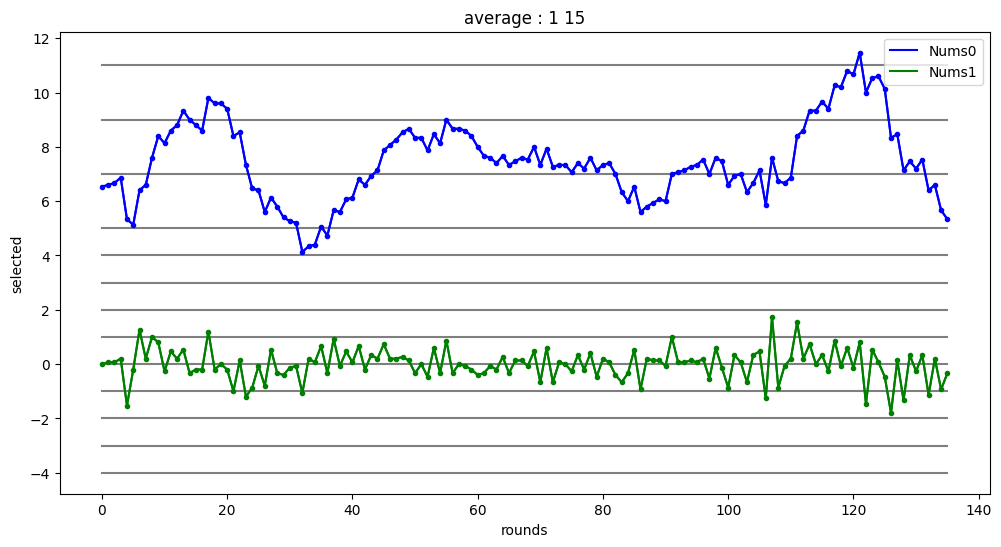

________________________________________
최소값          = [4.95, 5.1, 5.3, 5.35, 5.35]
마지막          = [7.55, 7.45, 6.65, 6.65, 6.35]


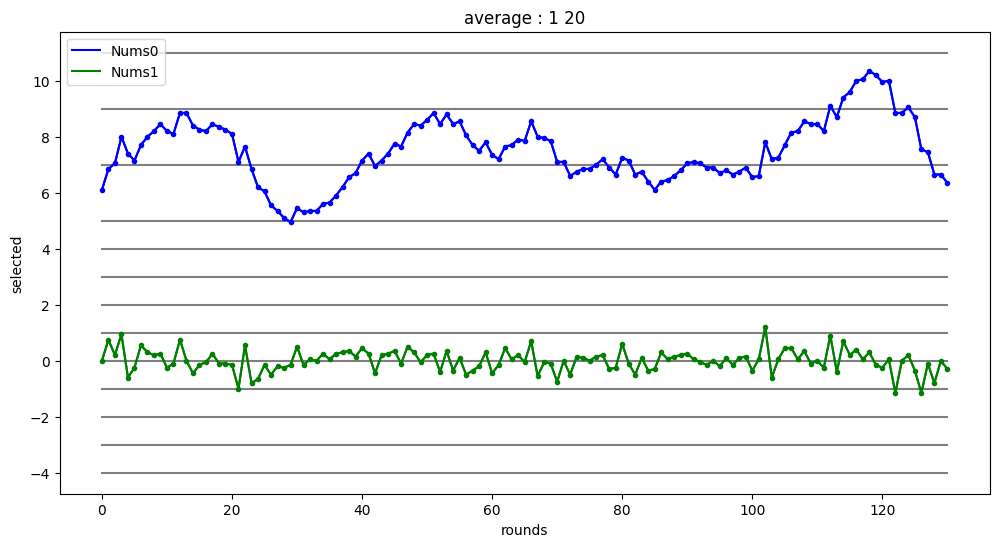

________________________________________
최소값          = [5.56, 5.68, 5.76, 5.8, 5.84]
마지막          = [9.04, 7.96, 8.12, 8.08, 7.72]


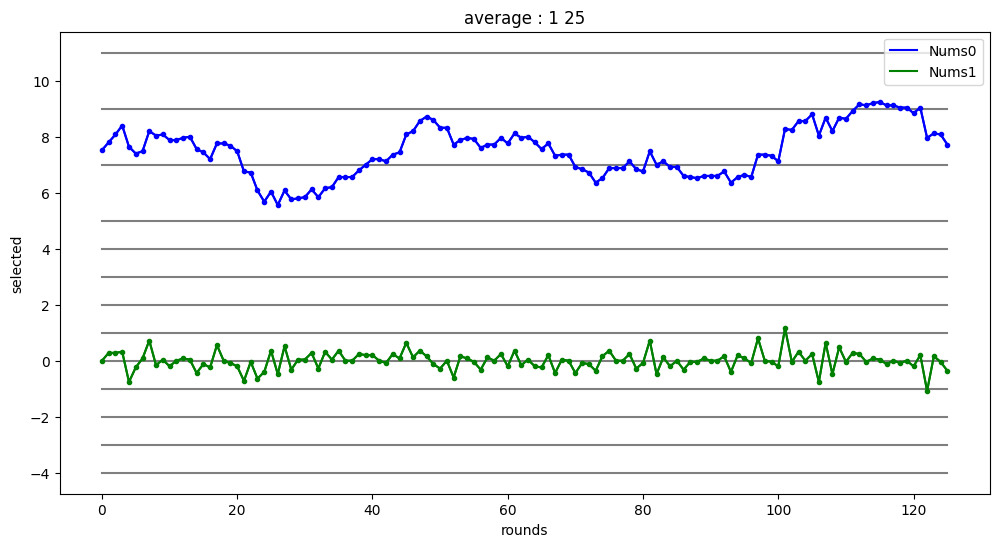

________________________________________
최소값          = [6.133333333333334, 6.2, 6.2, 6.266666666666667, 6.266666666666667]
마지막          = [8.466666666666667, 8.333333333333334, 8.4, 8.233333333333333, 8.0]


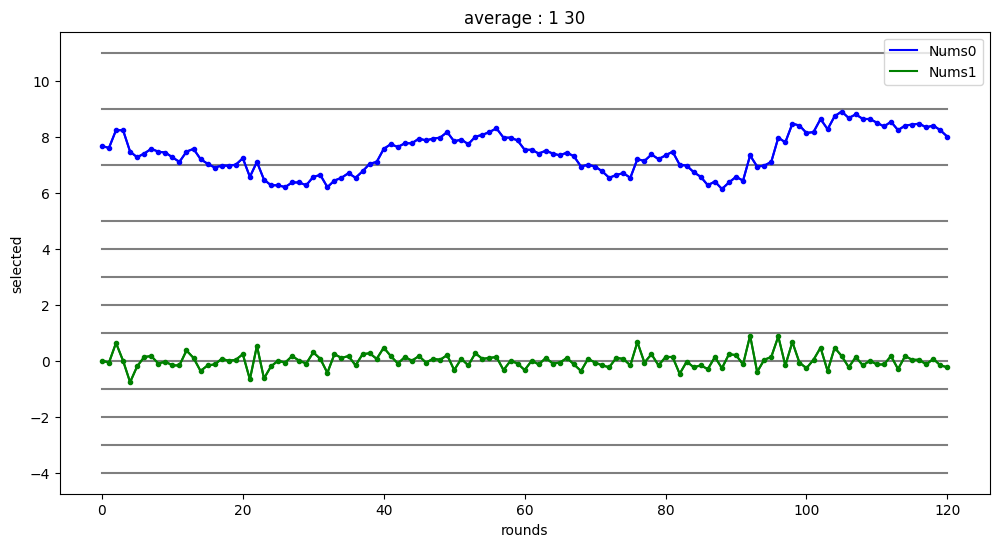

In [14]:
Round = 1
############################
selected = Round - 1
ext_data = 1
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

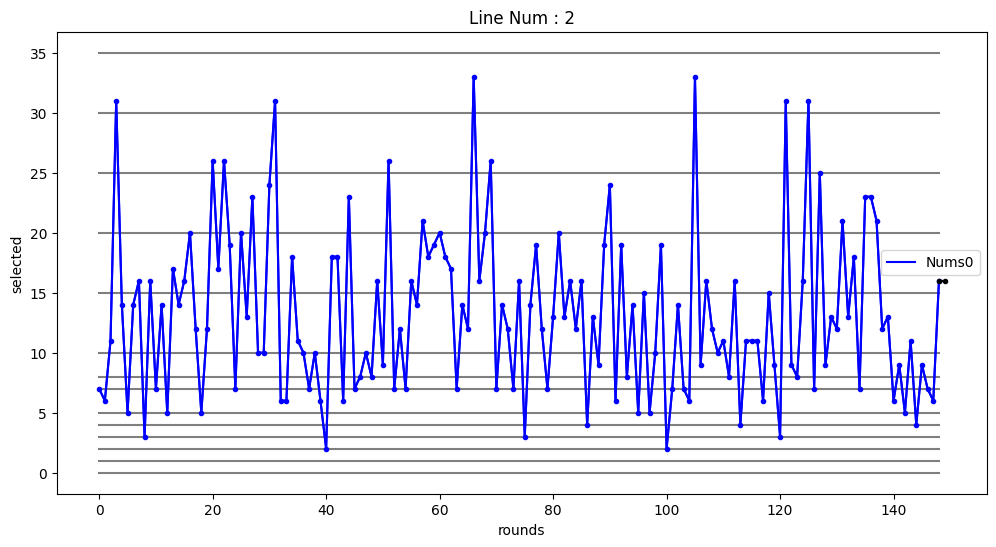

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
최대 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 16
마지막 값        = 16
마지막 값들       = [9, 3, 31, 9, 8, 16, 31, 7, 25, 9, 13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16]
자주 나오는 값(부분) = [(25, 1), (24, 2), (2, 2), (33, 2), (15, 2), (3, 3), (17, 3), (21, 3), (4, 3), (31, 4), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 7), (13, 7), (10, 7), (9, 8), (6, 10), (14, 10), (12, 10), (16, 14), (7, 16)]
자주 나오는 값(전체) = [(25, 1), (24, 2), (2, 2), (33, 2), (15, 2), (3, 3), (17, 3), (21, 3), (4, 3), (31, 4), (26, 4), (23, 4), (20, 5), (8, 5), (5, 6), (19, 6), (18, 6), (11, 7), (13, 7), (10, 7), (9, 8), (6, 10), (14, 10), (12, 10), (16, 13), (7, 16)]
마지막 수의 앞과 뒤  = [[1, 16, 6], [3, 16, 11]]
________________________________________
최소값          = [4.0, 4.5, 6.0, 6.0, 6.5]
마

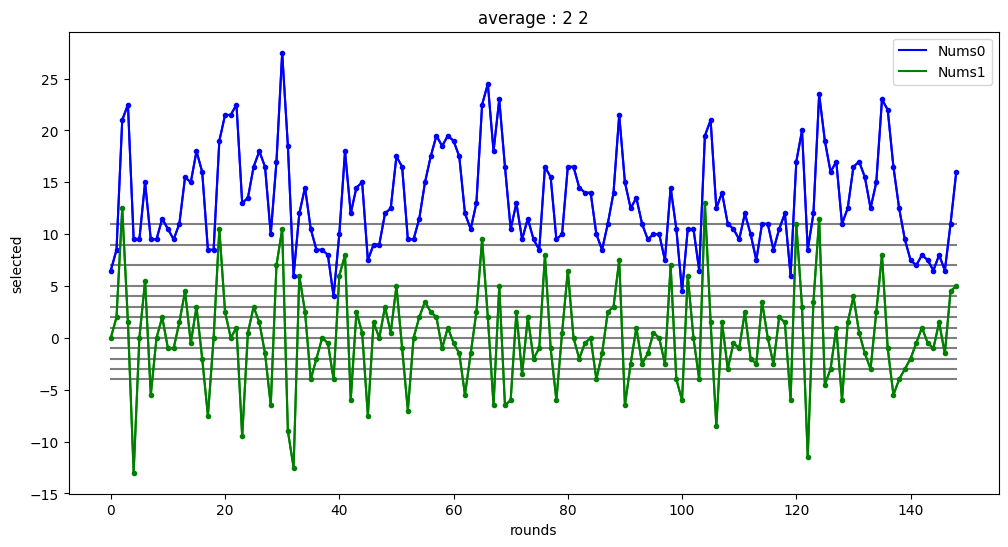

________________________________________
최소값          = [7.0, 7.0, 7.2, 7.2, 7.4]
마지막          = [7.6, 7.2, 7.4, 8.4, 10.8]


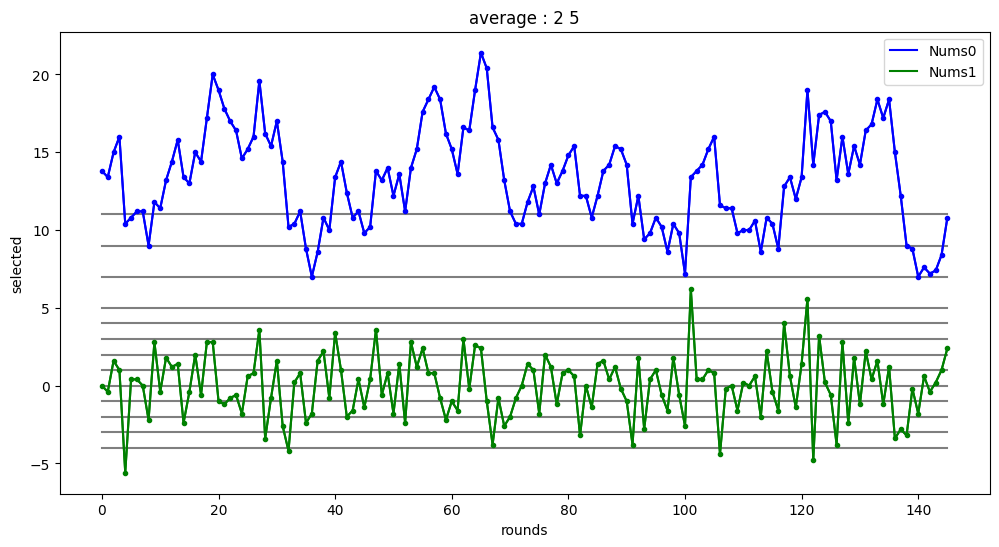

________________________________________
최소값          = [7.125, 8.0, 8.375, 8.625, 8.75]
마지막          = [8.625, 8.0, 7.125, 8.375, 9.25]


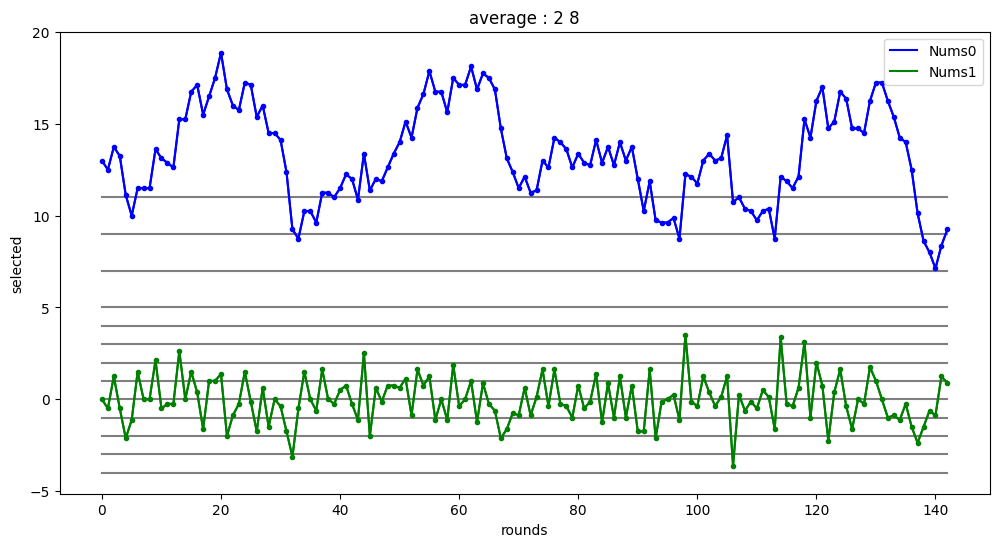

________________________________________
최소값          = [8.2, 8.6, 8.9, 9.0, 9.4]
마지막          = [11.3, 9.7, 8.2, 8.6, 8.9]


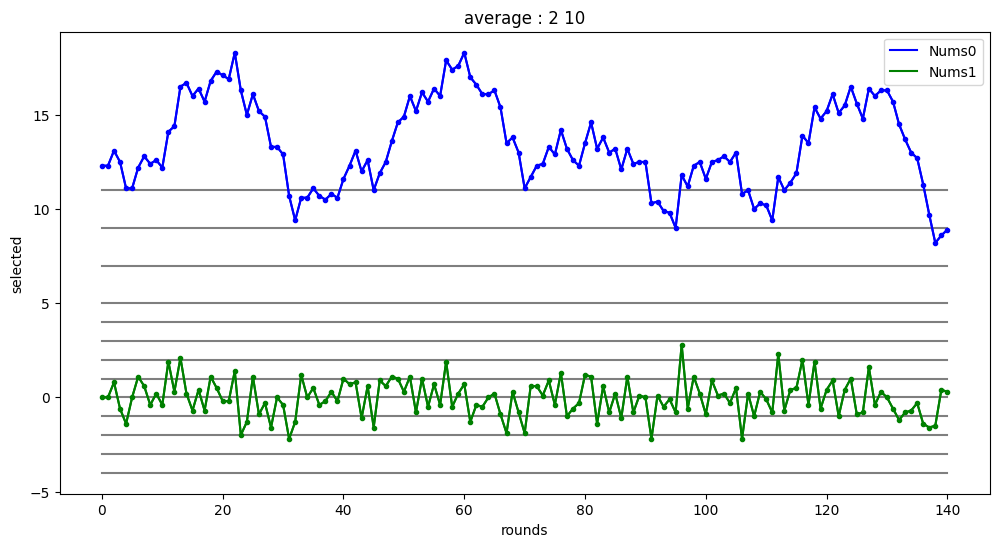

________________________________________
최소값          = [9.76923076923077, 10.076923076923077, 10.076923076923077, 10.23076923076923, 10.384615384615385]
마지막          = [12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923, 10.384615384615385]


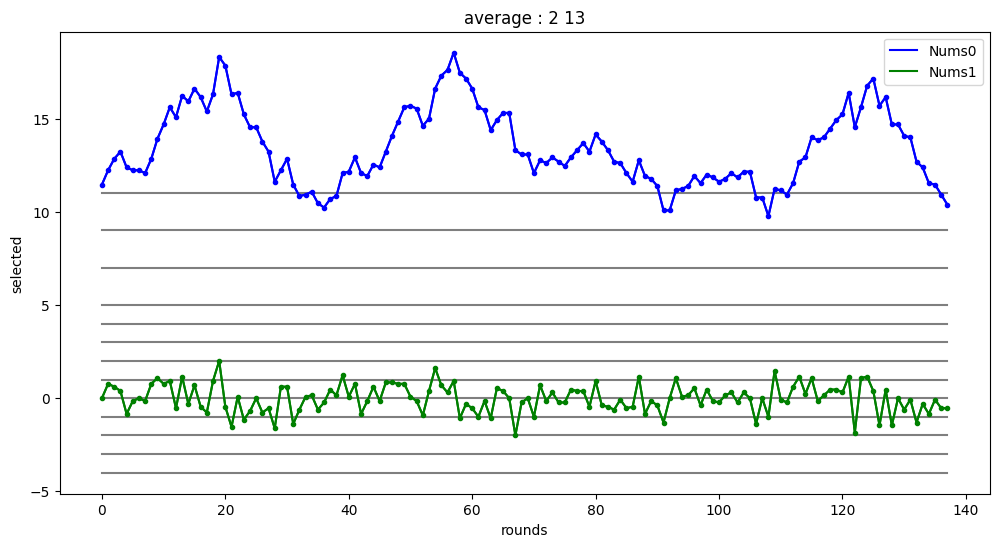

________________________________________
최소값          = [10.133333333333333, 10.4, 10.533333333333333, 10.666666666666666, 10.666666666666666]
마지막          = [13.0, 12.066666666666666, 11.6, 11.466666666666667, 12.066666666666666]


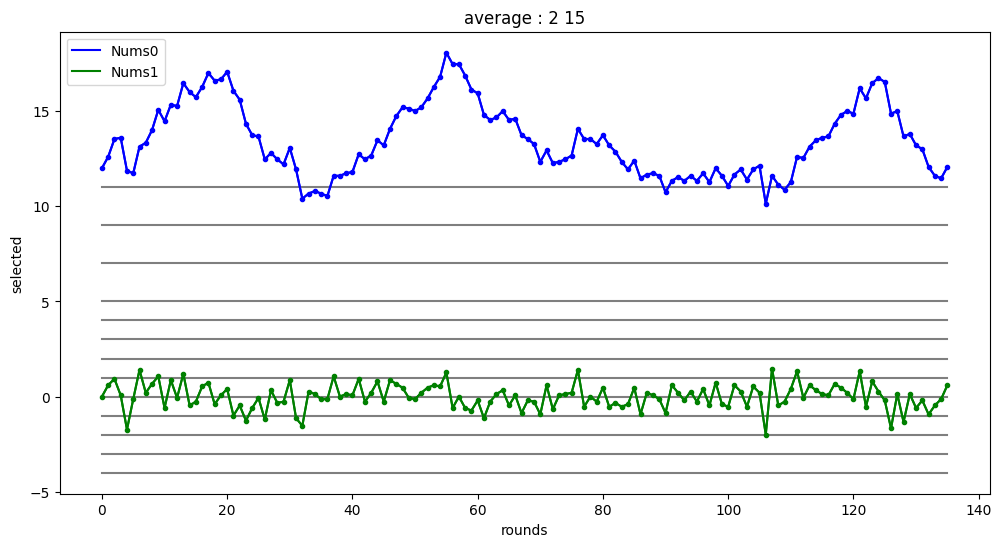

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.05, 11.1]
마지막          = [13.05, 13.05, 12.1, 12.45, 12.6]


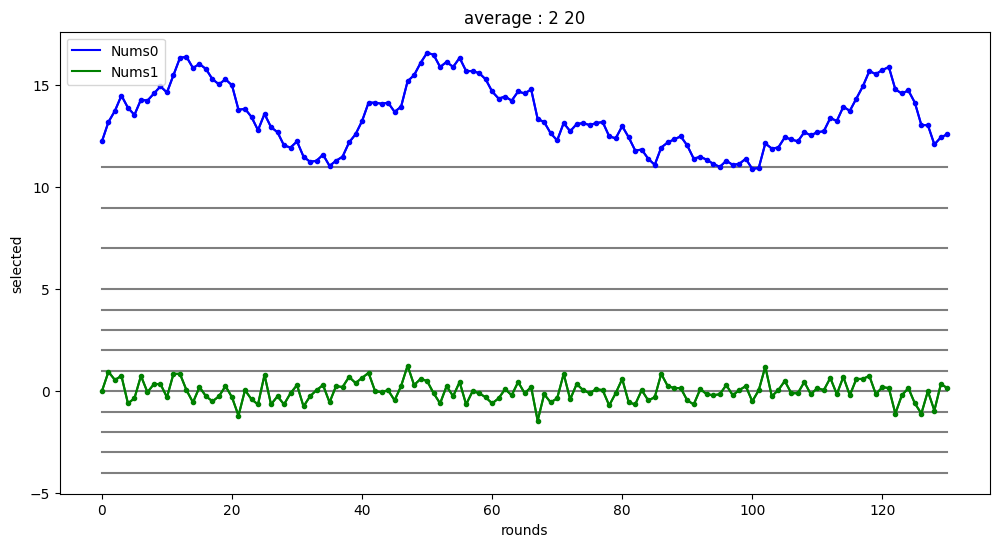

________________________________________
최소값          = [10.8, 10.8, 10.88, 11.08, 11.12]
마지막          = [14.24, 13.28, 13.16, 13.48, 13.48]


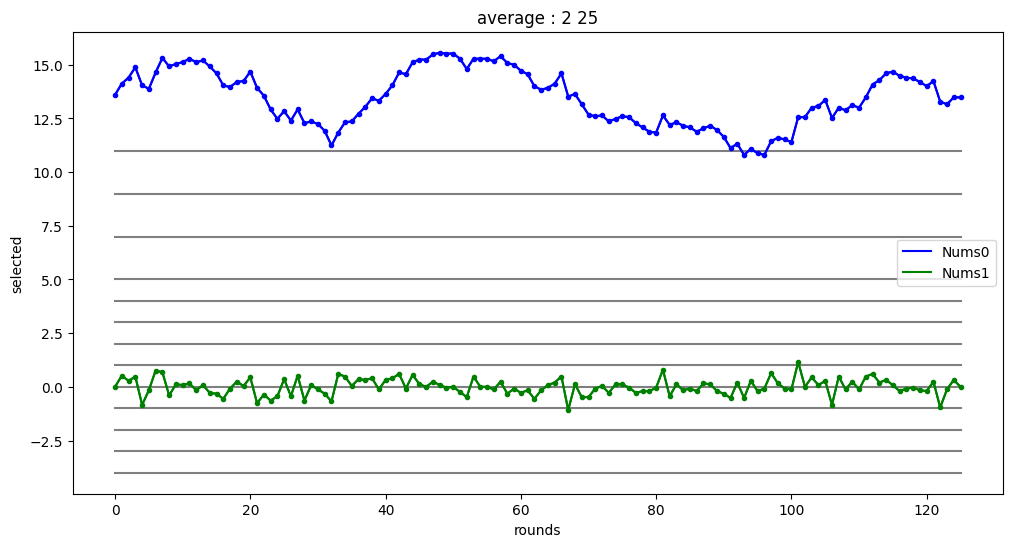

________________________________________
최소값          = [10.733333333333333, 11.233333333333333, 11.233333333333333, 11.3, 11.433333333333334]
마지막          = [13.333333333333334, 13.2, 13.2, 13.233333333333333, 13.466666666666667]


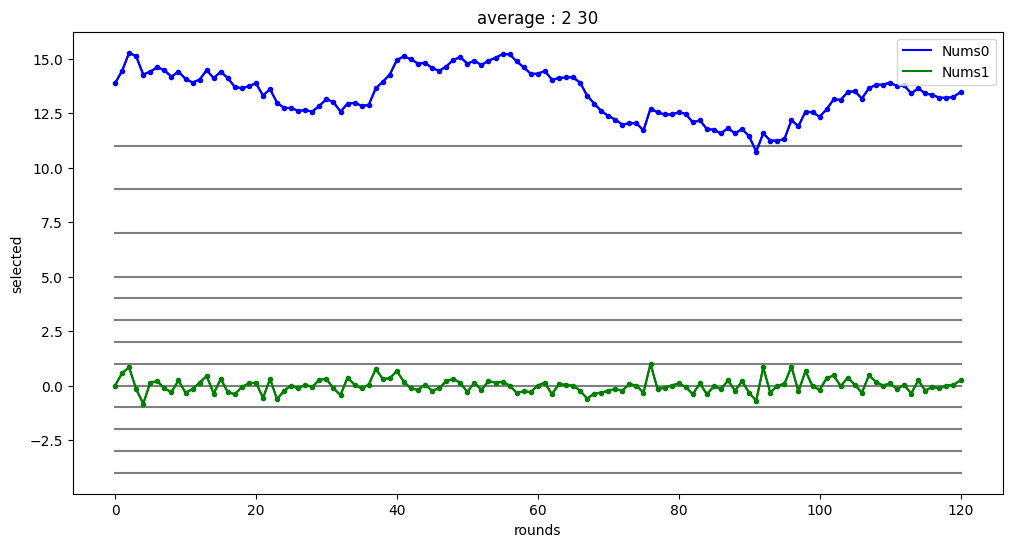

In [15]:
Round = 2
############################
selected = Round - 1
ext_data = 16
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

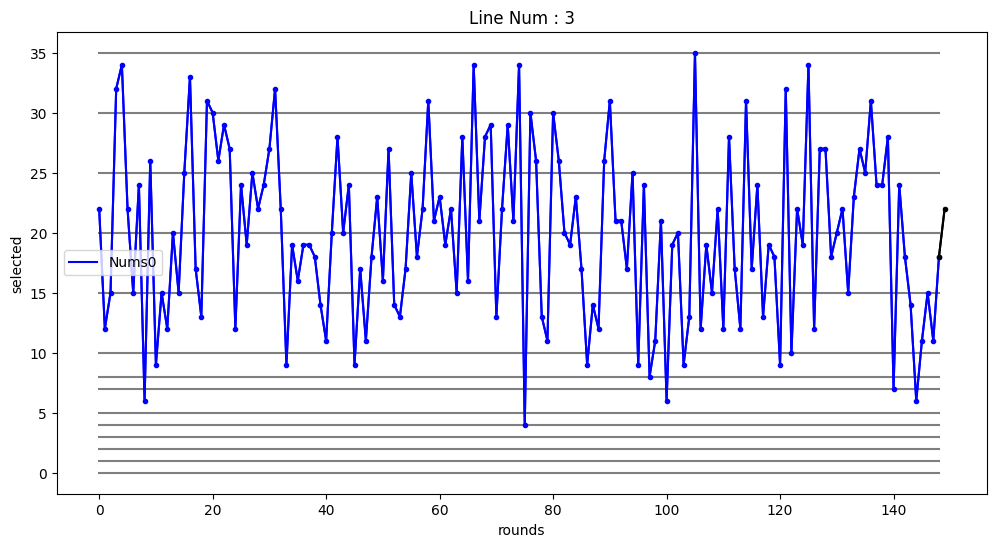

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
사용자 선택       = 22
마지막 값        = 18
마지막 값들       = [18, 9, 32, 10, 22, 19, 34, 12, 27, 27, 18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18]
자주 나오는 값(부분) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 3), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (14, 4), (23, 4), (26, 5), (25, 5), (31, 5), (28, 5), (20, 6), (13, 6), (27, 6), (11, 6), (21, 6), (9, 7), (17, 7), (18, 7), (12, 8), (15, 8), (24, 9), (19, 10), (22, 11)]
자주 나오는 값(전체) = [(4, 1), (8, 1), (35, 1), (10, 1), (7, 1), (32, 3), (6, 3), (30, 3), (29, 3), (16, 3), (34, 4), (14, 4), (23, 4), (26, 5), (25, 5), (31, 5), (28, 5), (20, 6), (13, 6), (27, 6), (11, 6), (21, 6), (9, 7), (17, 7), (18, 7), (12, 8), (15, 8), (24, 9), (22, 10), (19, 10)]
마지

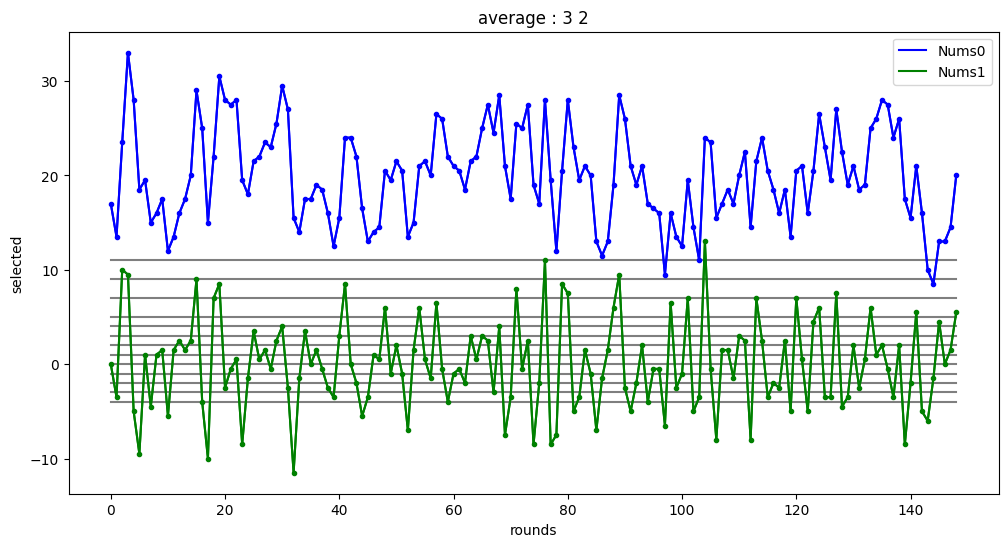

________________________________________
최소값          = [11.4, 12.2, 12.8, 13.0, 13.4]
마지막          = [14.6, 12.8, 11.4, 12.2, 15.4]


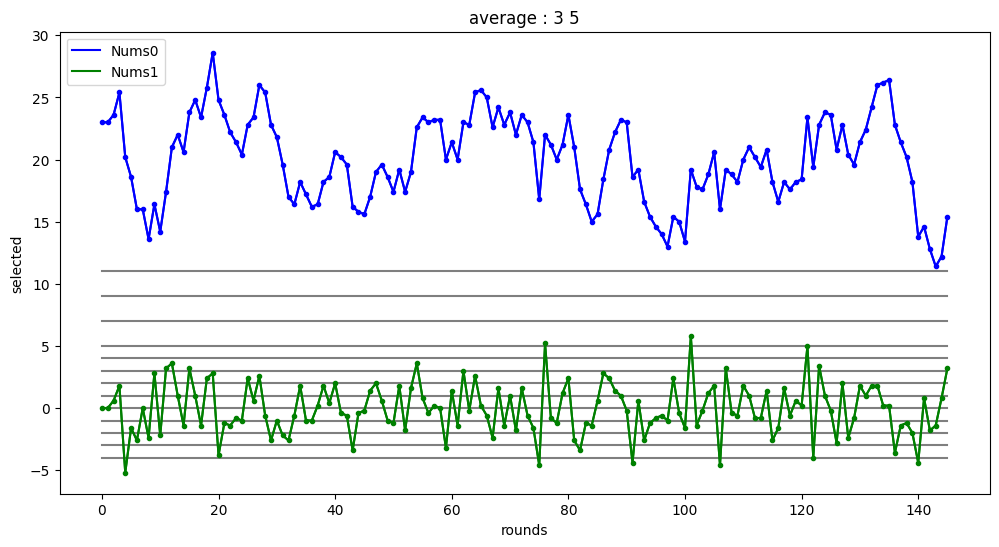

________________________________________
최소값          = [13.25, 13.375, 14.375, 14.625, 14.75]
마지막          = [16.5, 15.375, 13.25, 14.625, 14.375]


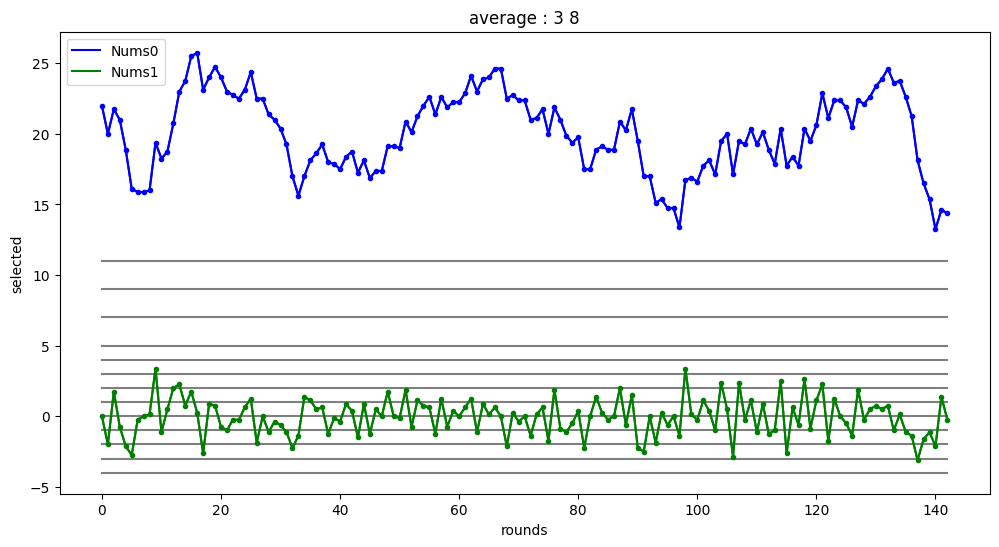

________________________________________
최소값          = [14.0, 14.6, 15.2, 15.2, 15.4]
마지막          = [18.7, 17.1, 15.8, 15.2, 14.6]


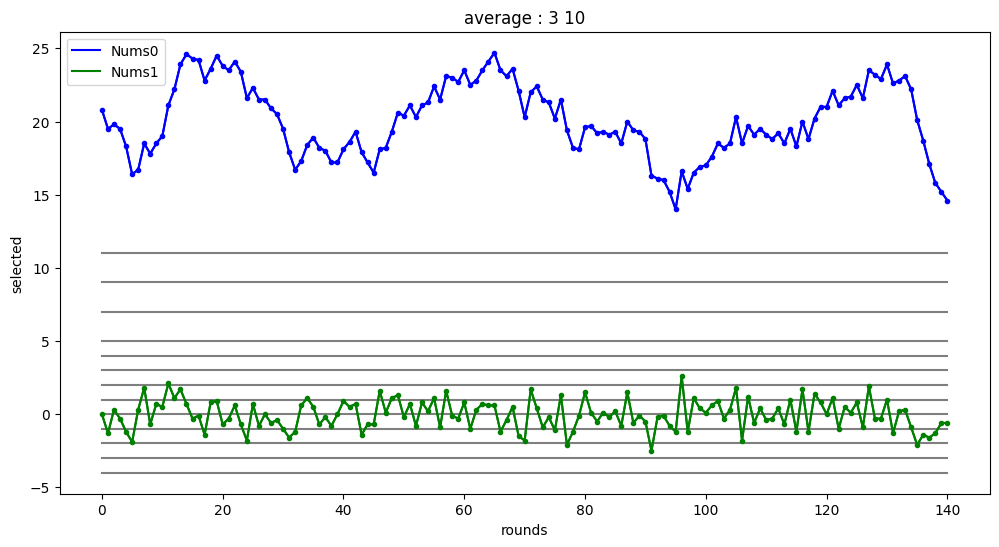

________________________________________
최소값          = [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
마지막          = [20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077, 17.076923076923077]


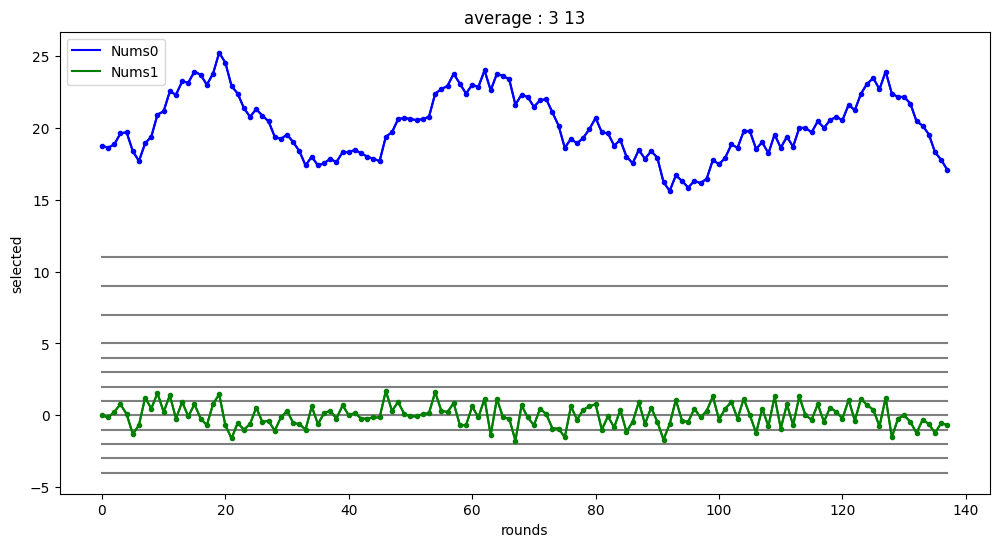

________________________________________
최소값          = [16.2, 16.4, 16.4, 16.533333333333335, 16.666666666666668]
마지막          = [19.933333333333334, 19.466666666666665, 19.2, 18.866666666666667, 18.533333333333335]


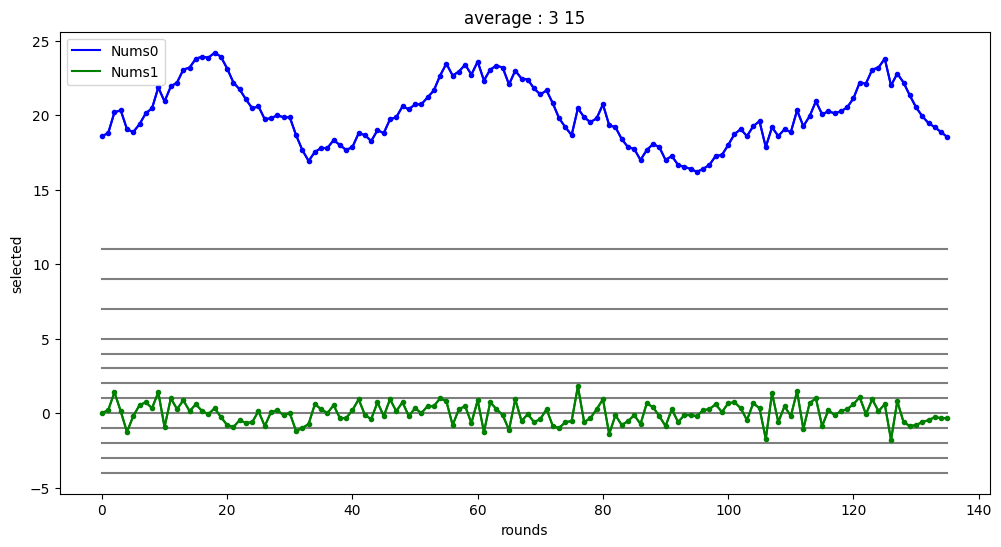

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15]
마지막          = [20.15, 20.3, 19.5, 19.05, 19.25]


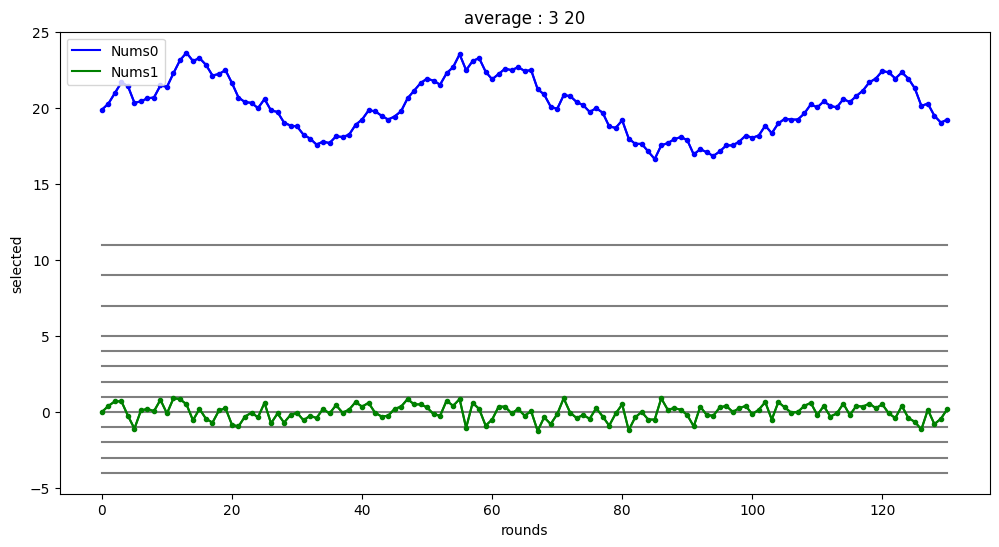

________________________________________
최소값          = [17.24, 17.36, 17.36, 17.44, 17.48]
마지막          = [20.8, 20.12, 20.16, 20.0, 20.12]


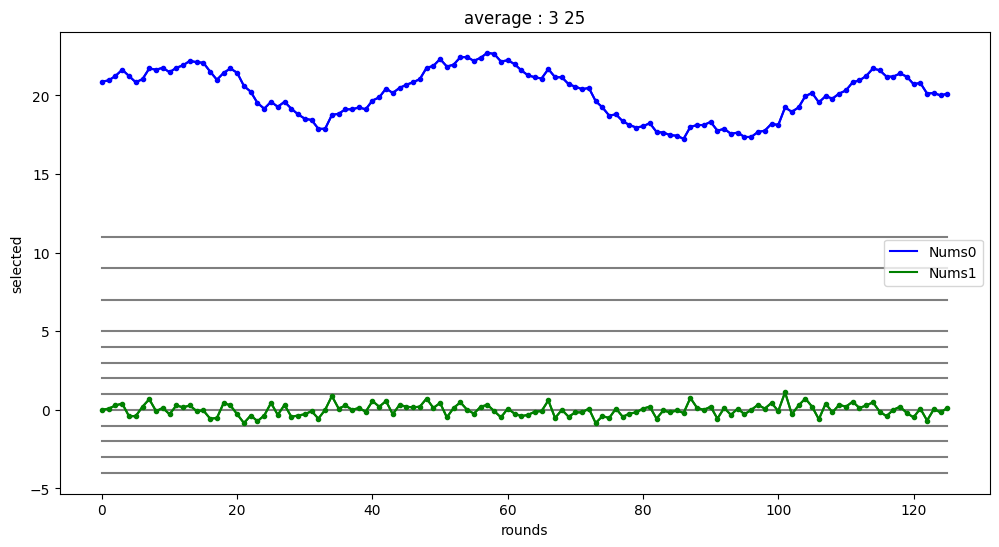

________________________________________
최소값          = [17.533333333333335, 17.566666666666666, 17.566666666666666, 17.6, 17.733333333333334]
마지막          = [20.1, 19.8, 19.733333333333334, 19.7, 19.833333333333332]


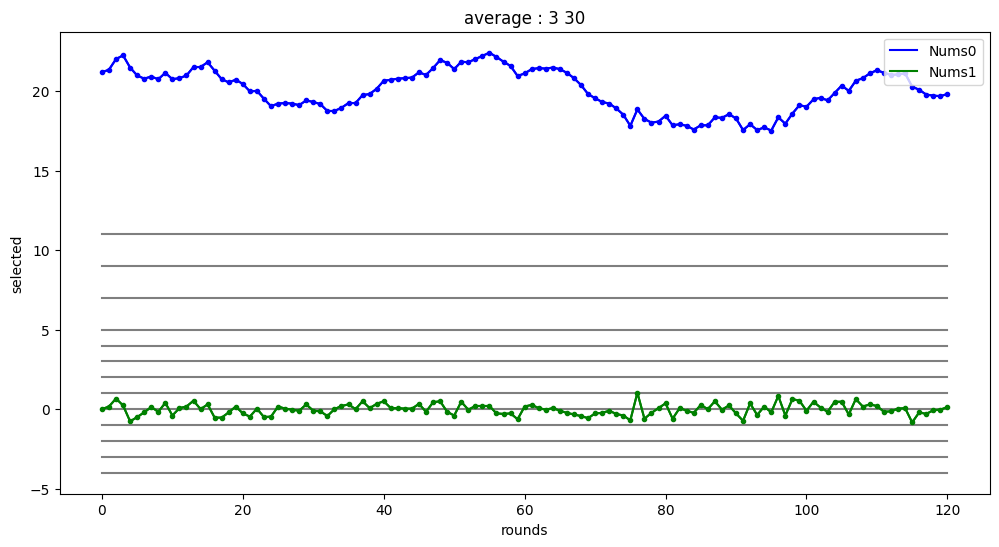

In [16]:
Round = 3
############################
selected = Round - 1
ext_data = 22
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

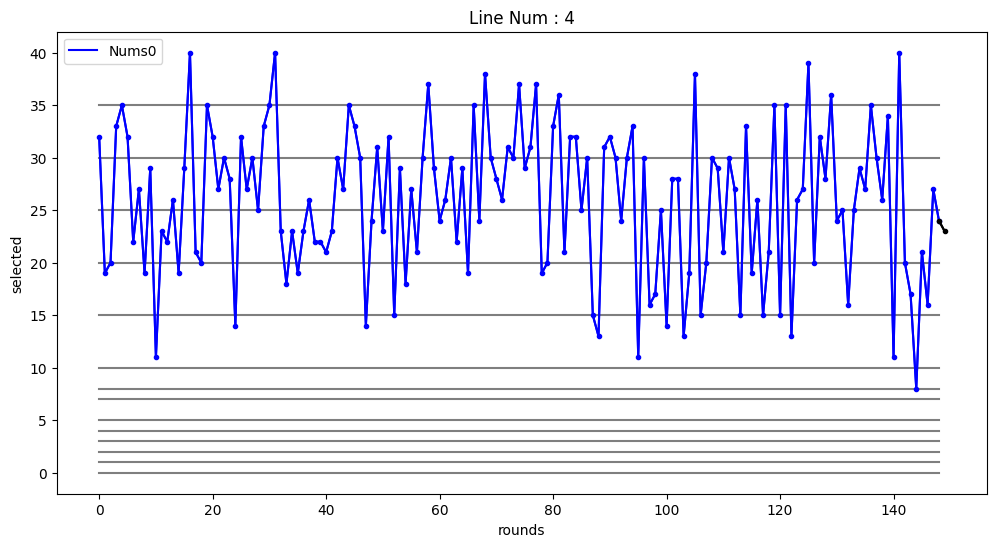

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
최대 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 23
마지막 값        = 24
마지막 값들       = [35, 15, 35, 13, 26, 27, 39, 20, 32, 28, 36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24]
자주 나오는 값(부분) = [(39, 1), (34, 1), (8, 1), (18, 2), (38, 2), (36, 2), (17, 2), (11, 3), (40, 3), (14, 3), (37, 3), (13, 3), (16, 3), (31, 4), (22, 5), (28, 5), (25, 5), (20, 6), (33, 6), (24, 6), (15, 6), (23, 7), (26, 7), (21, 7), (19, 8), (35, 8), (29, 8), (32, 9), (27, 9), (30, 15)]
자주 나오는 값(전체) = [(39, 1), (34, 1), (8, 1), (18, 2), (38, 2), (36, 2), (17, 2), (11, 3), (40, 3), (14, 3), (37, 3), (13, 3), (16, 3), (31, 4), (22, 5), (28, 5), (25, 5), (20, 6), (33, 6), (23, 6), (24, 6), (15, 6), (26, 7), (21, 7), (19, 8), (35, 8), (29, 8), (32, 9), (27, 9

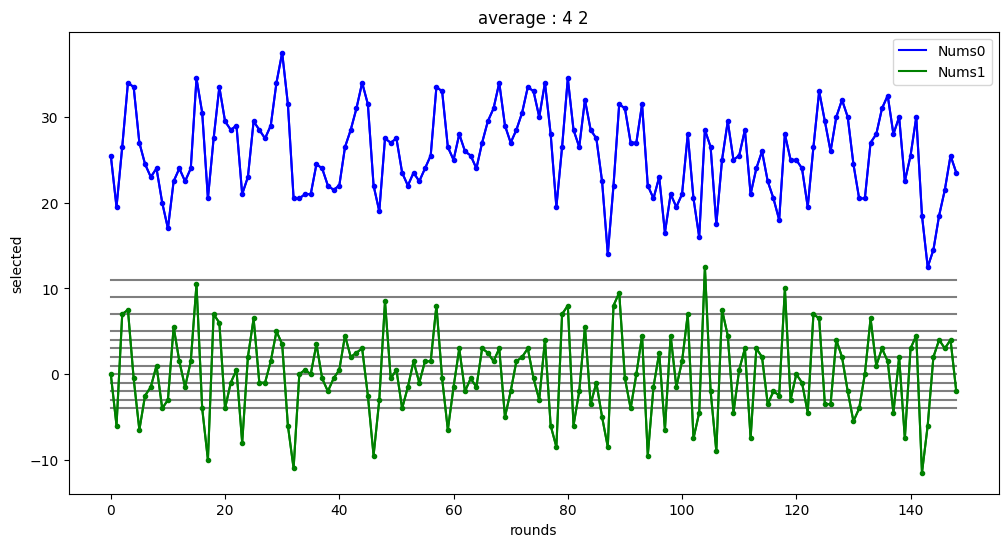

________________________________________
최소값          = [16.4, 17.8, 19.2, 19.2, 19.8]
마지막          = [21.2, 16.4, 17.8, 19.2, 22.2]


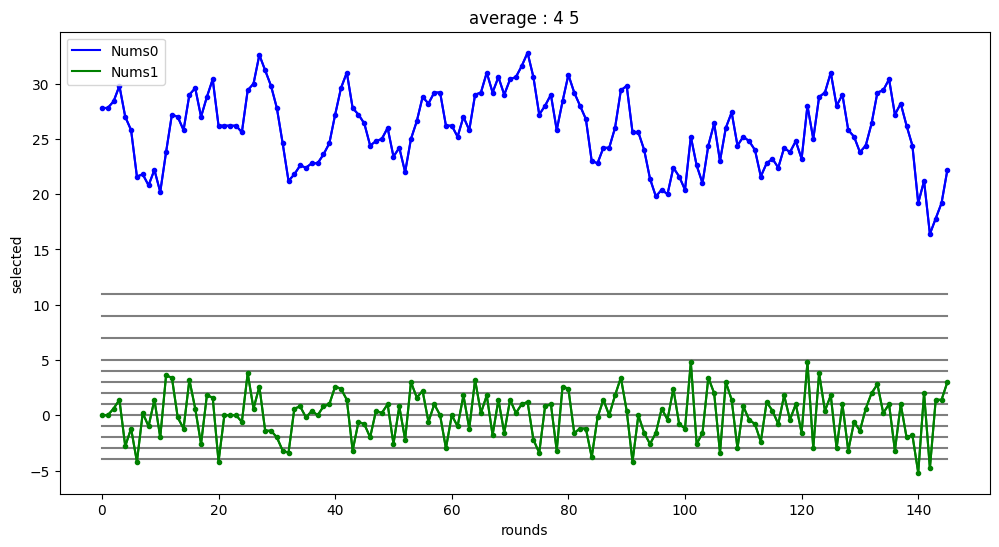

________________________________________
최소값          = [19.5, 20.0, 20.0, 20.875, 21.125]
마지막          = [22.125, 20.875, 20.0, 21.625, 19.5]


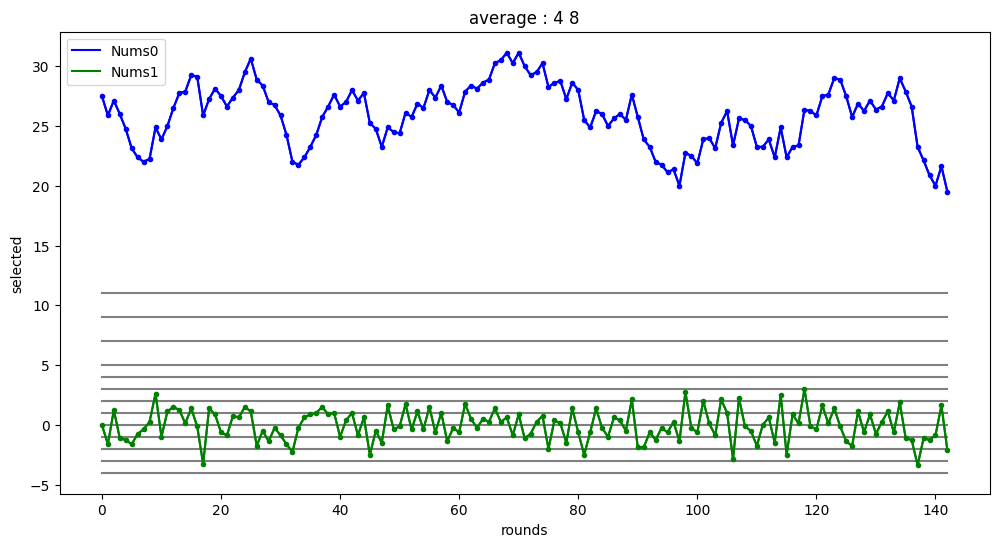

________________________________________
최소값          = [20.1, 20.7, 21.3, 21.5, 21.7]
마지막          = [24.2, 22.3, 22.0, 21.8, 20.7]


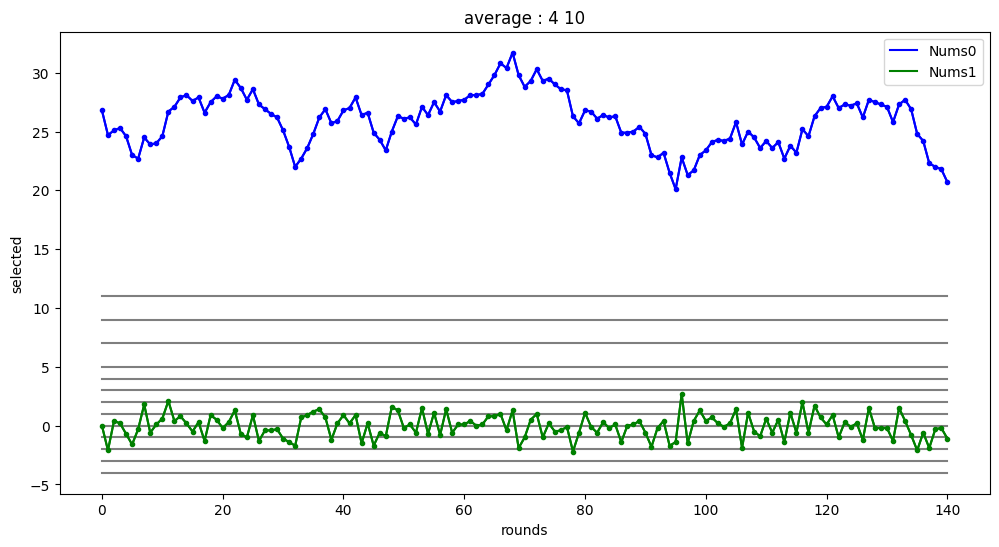

________________________________________
최소값          = [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
마지막          = [24.846153846153847, 24.153846153846153, 24.0, 23.76923076923077, 22.846153846153847]


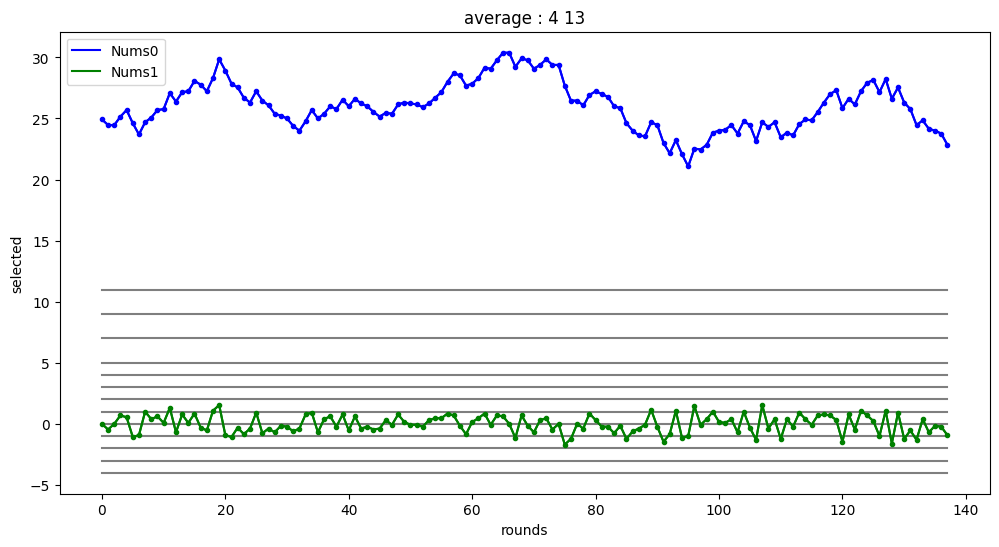

________________________________________
최소값          = [22.2, 22.466666666666665, 22.466666666666665, 22.733333333333334, 22.866666666666667]
마지막          = [24.266666666666666, 23.666666666666668, 24.4, 24.333333333333332, 23.933333333333334]


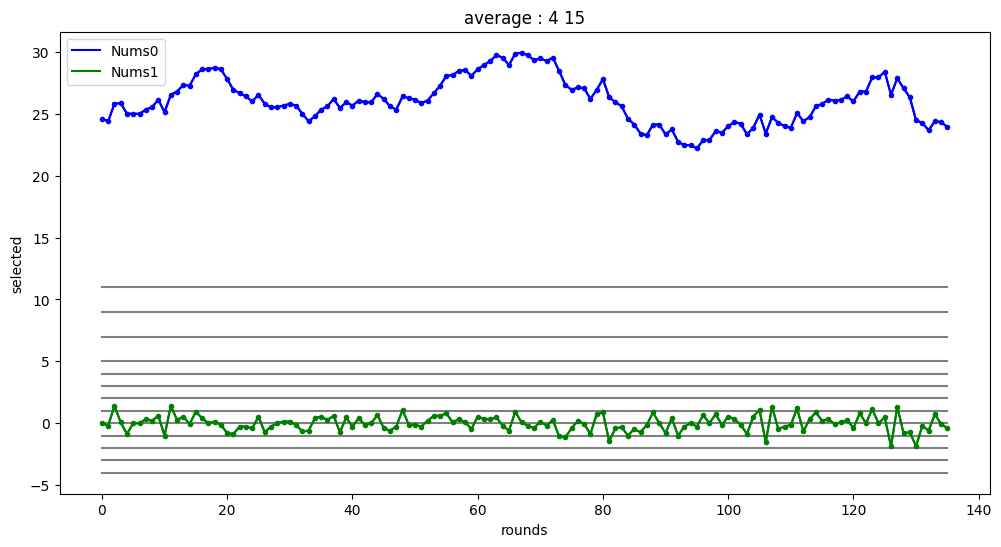

________________________________________
최소값          = [22.95, 22.95, 23.1, 23.1, 23.15]
마지막          = [25.2, 25.0, 24.75, 24.55, 23.9]


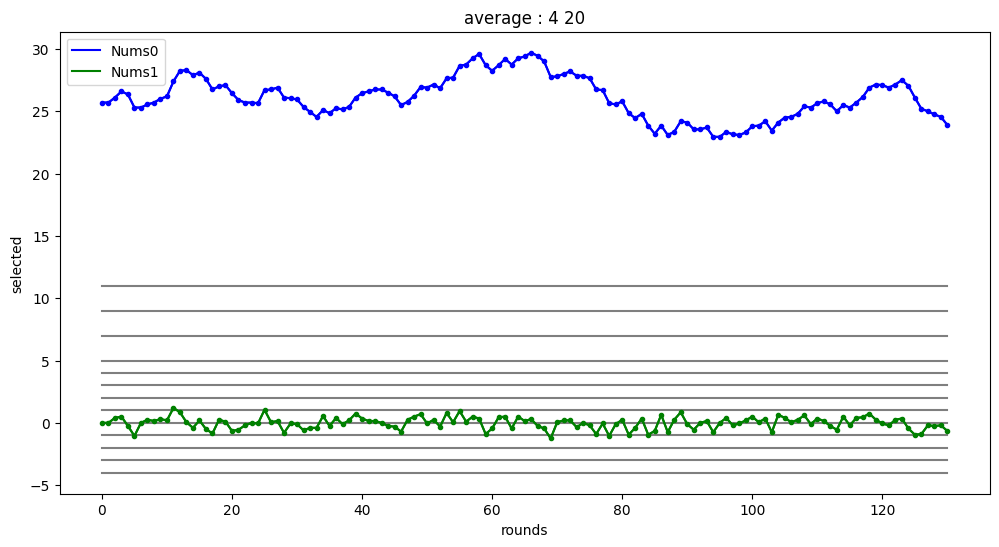

________________________________________
최소값          = [22.92, 23.0, 23.16, 23.24, 23.28]
마지막          = [25.76, 25.0, 25.56, 25.48, 25.32]


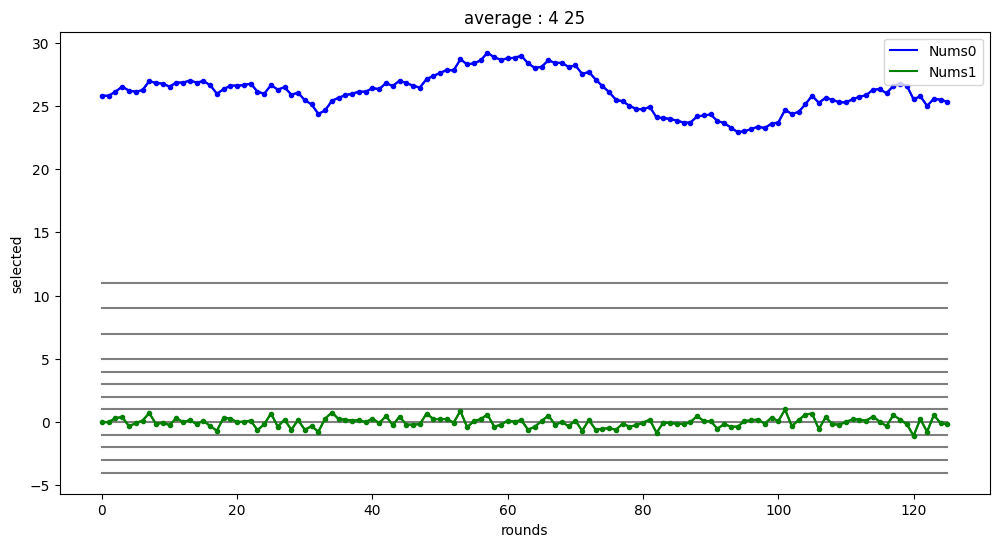

________________________________________
최소값          = [23.033333333333335, 23.233333333333334, 23.366666666666667, 23.566666666666666, 23.633333333333333]
마지막          = [25.2, 24.866666666666667, 25.266666666666666, 25.366666666666667, 24.966666666666665]


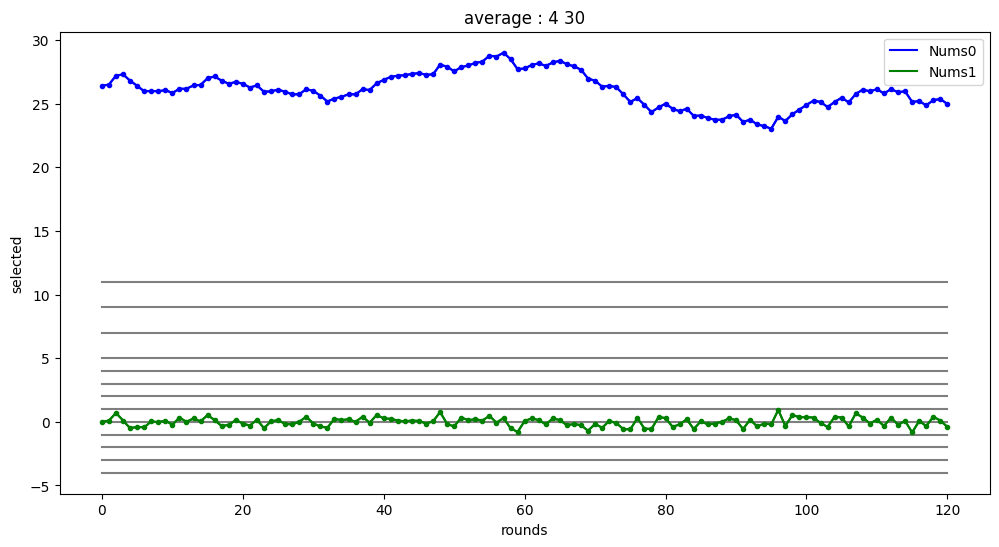

In [17]:
Round = 4
############################
selected = Round - 1
ext_data = 23
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

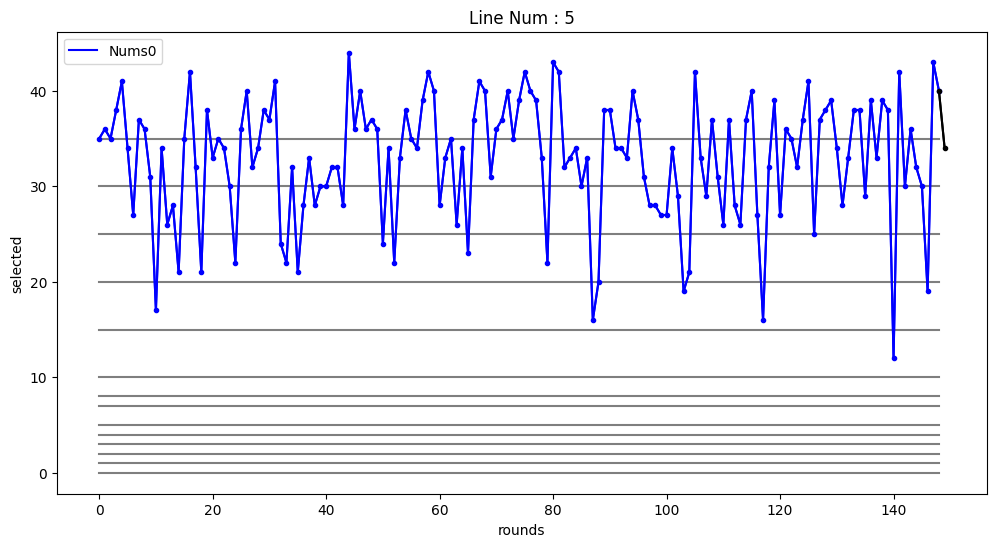

최소 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
최대 값         = [12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택       = 34
마지막 값        = 40
마지막 값들       = [39, 27, 36, 35, 32, 37, 41, 25, 37, 38, 39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40]
자주 나오는 값(부분) = [(17, 1), (44, 1), (23, 1), (20, 1), (25, 1), (12, 1), (24, 2), (43, 2), (16, 2), (19, 2), (29, 3), (41, 4), (31, 4), (26, 4), (21, 4), (22, 4), (27, 5), (42, 6), (30, 6), (39, 7), (35, 8), (36, 9), (28, 9), (32, 9), (40, 9), (38, 10), (37, 11), (33, 11), (34, 13)]
자주 나오는 값(전체) = [(17, 1), (44, 1), (23, 1), (20, 1), (25, 1), (12, 1), (24, 2), (43, 2), (16, 2), (19, 2), (29, 3), (41, 4), (31, 4), (26, 4), (21, 4), (22, 4), (27, 5), (42, 6), (30, 6), (39, 7), (35, 8), (36, 9), (28, 9), (32, 9), (40, 9), (38, 10), (37, 11), (33, 11), (34, 12)]
마지

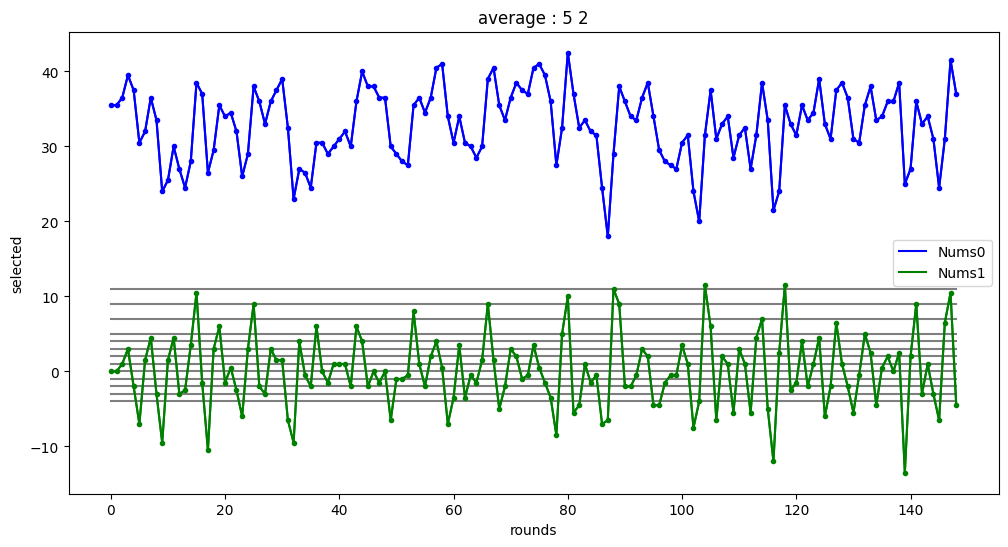

________________________________________
최소값          = [25.2, 25.4, 26.0, 26.6, 27.2]
마지막          = [34.0, 29.4, 32.0, 32.8, 33.2]


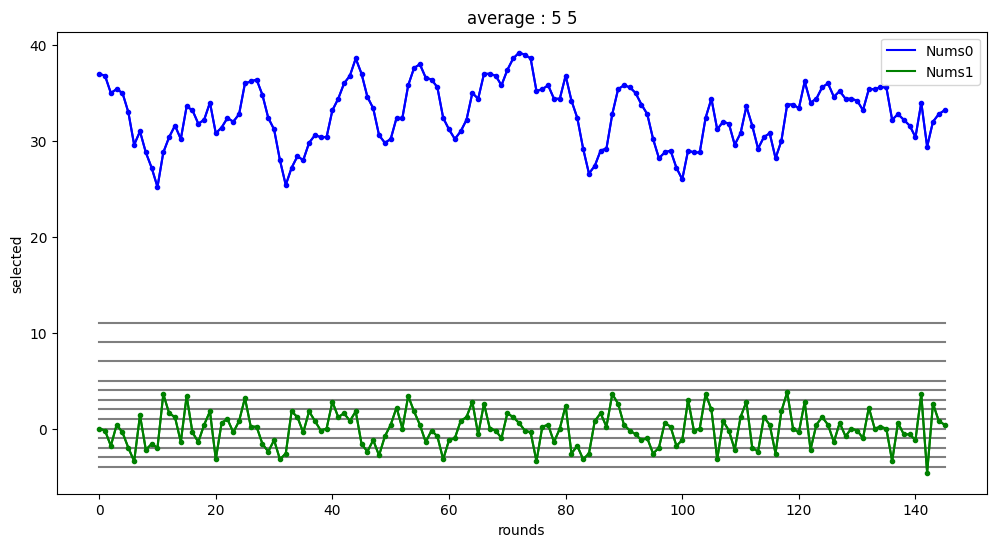

________________________________________
최소값          = [26.625, 27.25, 27.875, 28.0, 28.375]
마지막          = [32.375, 29.875, 30.5, 34.0, 33.0]


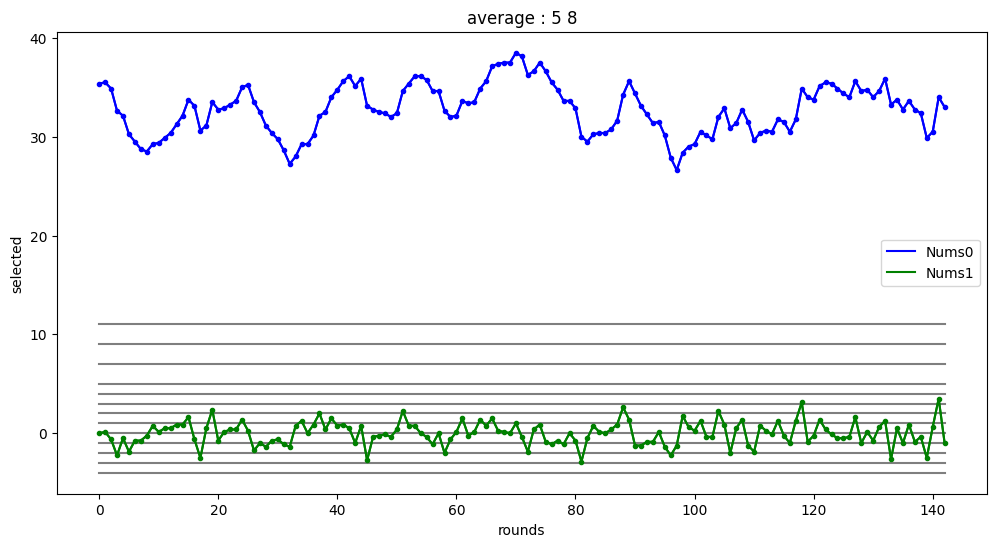

________________________________________
최소값          = [28.0, 28.1, 28.6, 28.7, 28.8]
마지막          = [33.1, 31.1, 32.1, 32.2, 31.8]


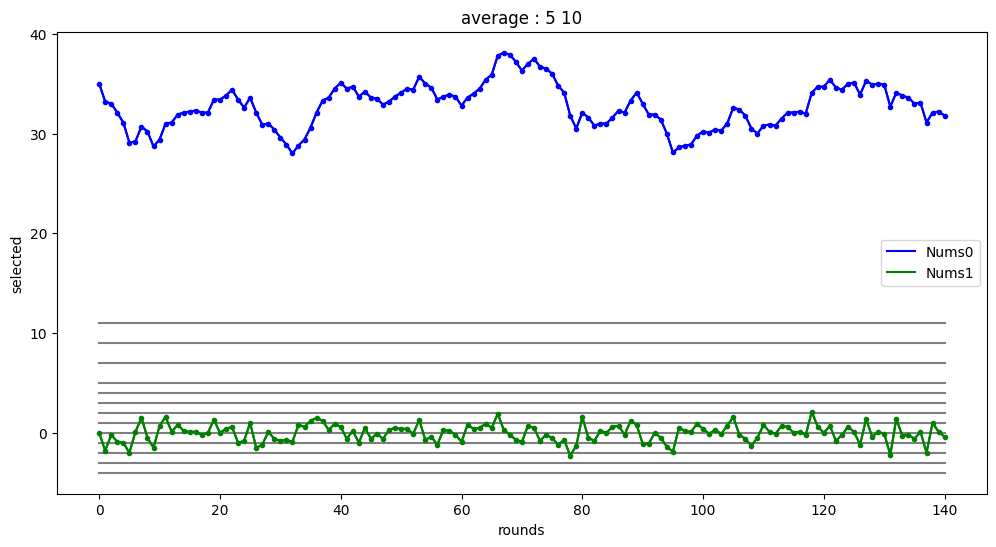

________________________________________
최소값          = [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.615384615384617]
마지막          = [33.53846153846154, 32.07692307692308, 32.46153846153846, 33.30769230769231, 32.92307692307692]


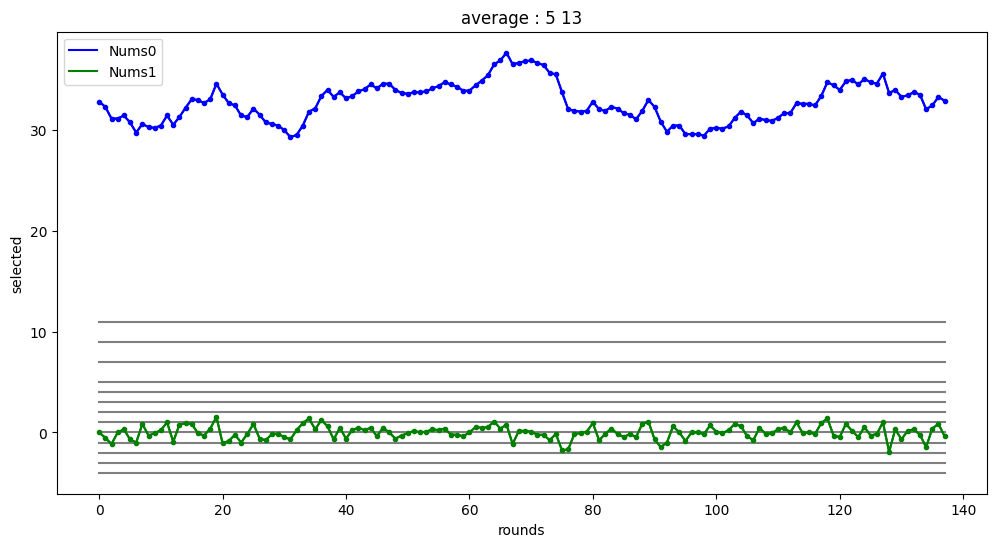

________________________________________
최소값          = [29.466666666666665, 29.733333333333334, 29.866666666666667, 29.866666666666667, 29.866666666666667]
마지막          = [33.13333333333333, 32.53333333333333, 33.2, 33.333333333333336, 33.06666666666667]


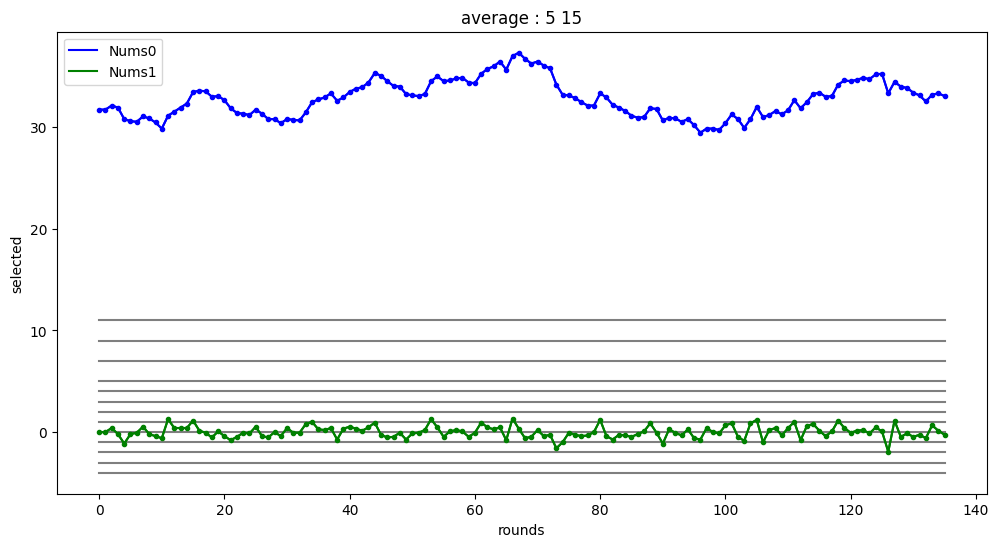

________________________________________
최소값          = [29.7, 29.85, 29.9, 30.3, 30.35]
마지막          = [33.5, 33.2, 33.5, 33.6, 33.35]


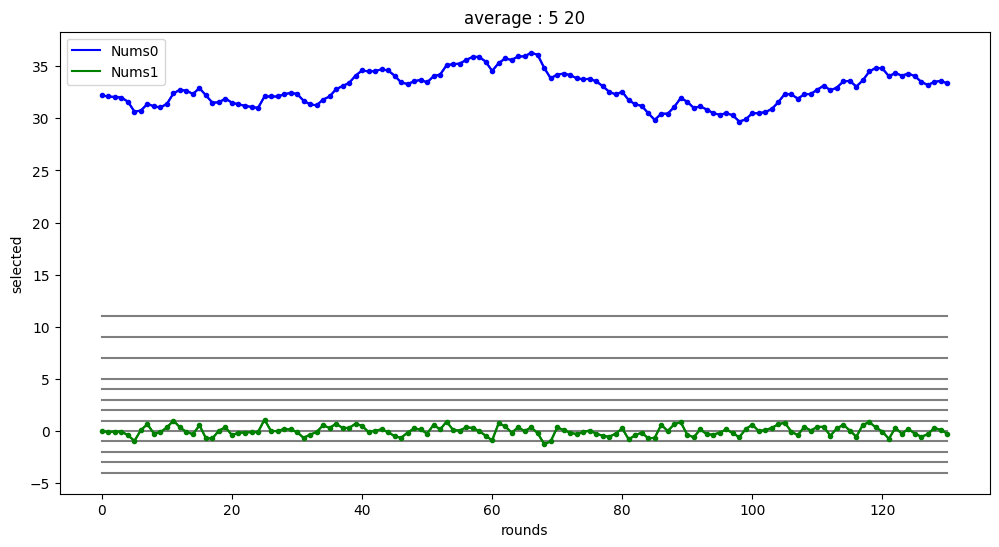

________________________________________
최소값          = [30.04, 30.24, 30.44, 30.48, 30.52]
마지막          = [34.04, 33.36, 33.68, 34.0, 33.88]


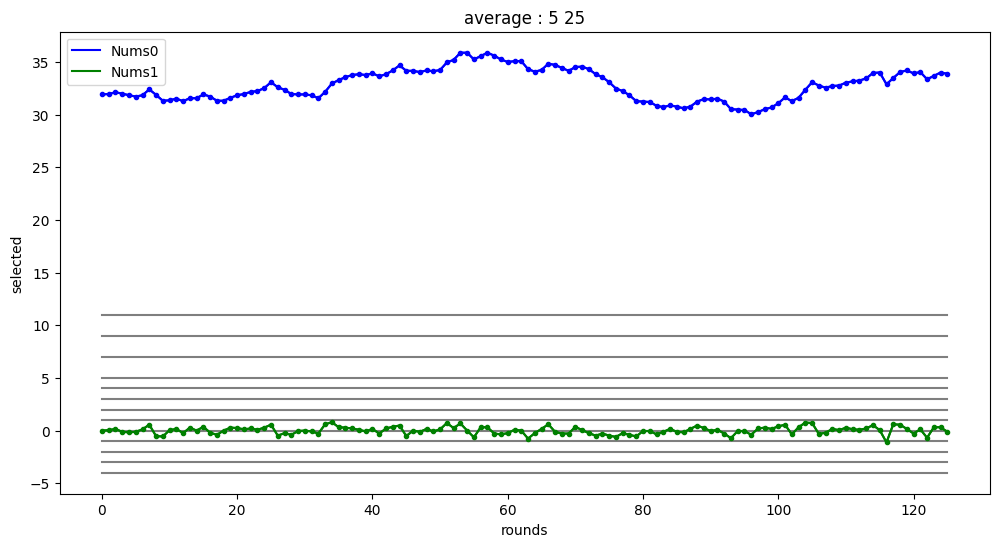

________________________________________
최소값          = [30.666666666666668, 30.766666666666666, 30.8, 30.833333333333332, 30.866666666666667]
마지막          = [33.06666666666667, 32.8, 33.7, 33.96666666666667, 33.8]


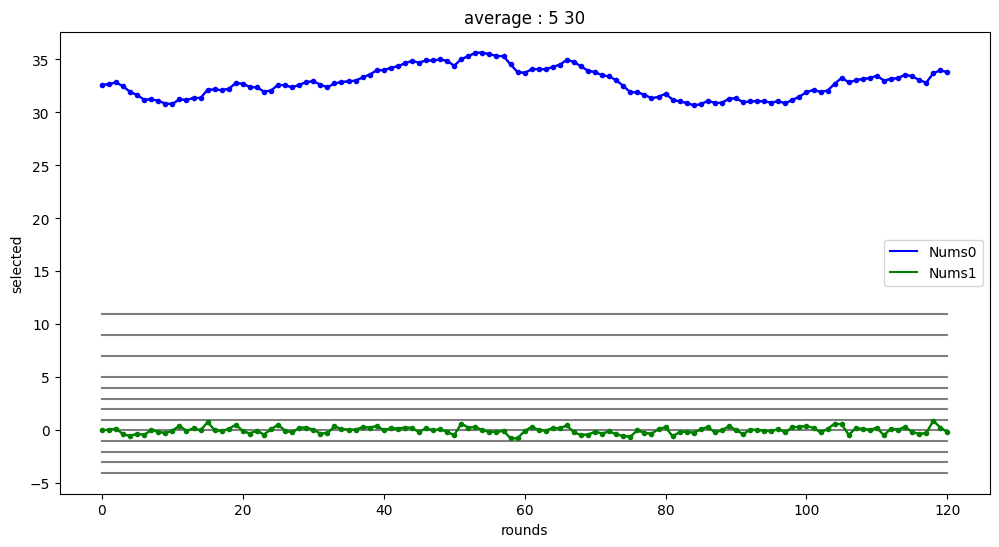

In [18]:
Round = 5
############################
selected = Round - 1
ext_data = 34
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

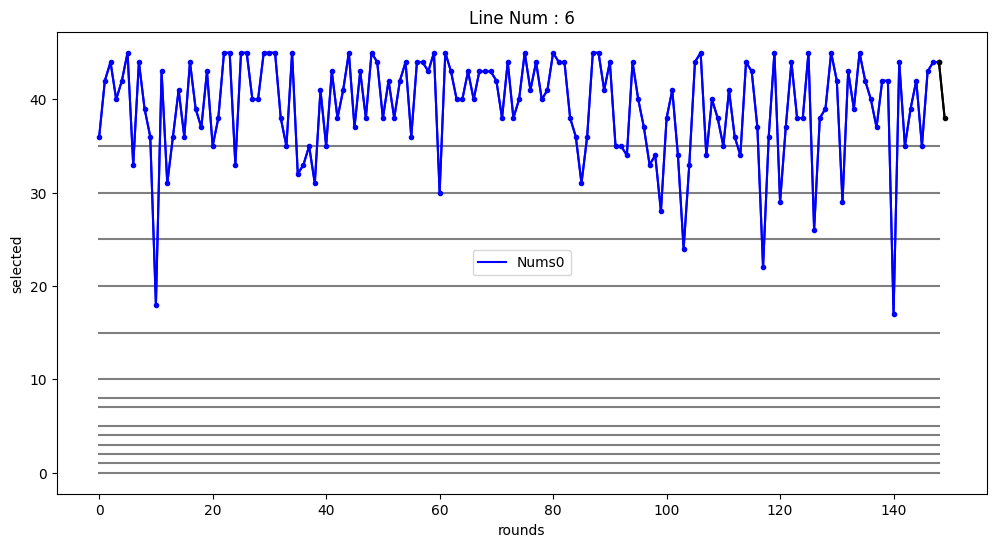

최소 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
최대 값         = [17, 18, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 38
마지막 값        = 44
마지막 값들       = [45, 29, 37, 44, 38, 38, 45, 26, 38, 39, 45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44]
자주 나오는 값(부분) = [(18, 1), (32, 1), (30, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (29, 2), (31, 3), (33, 5), (39, 5), (34, 5), (37, 6), (41, 8), (36, 9), (35, 9), (42, 10), (40, 11), (43, 13), (38, 15), (44, 19), (45, 22)]
자주 나오는 값(전체) = [(18, 1), (32, 1), (30, 1), (28, 1), (24, 1), (22, 1), (26, 1), (17, 1), (29, 2), (31, 3), (33, 5), (39, 5), (34, 5), (37, 6), (41, 8), (36, 9), (35, 9), (42, 10), (40, 11), (43, 13), (38, 14), (44, 19), (45, 22)]
마지막 수의 앞과 뒤  = []
________________________________________
최소값          = [27.0, 28.5, 29.0, 29.0, 29.5]
마지막          = [38.5, 39.0, 43.5, 44.0, 41.0]


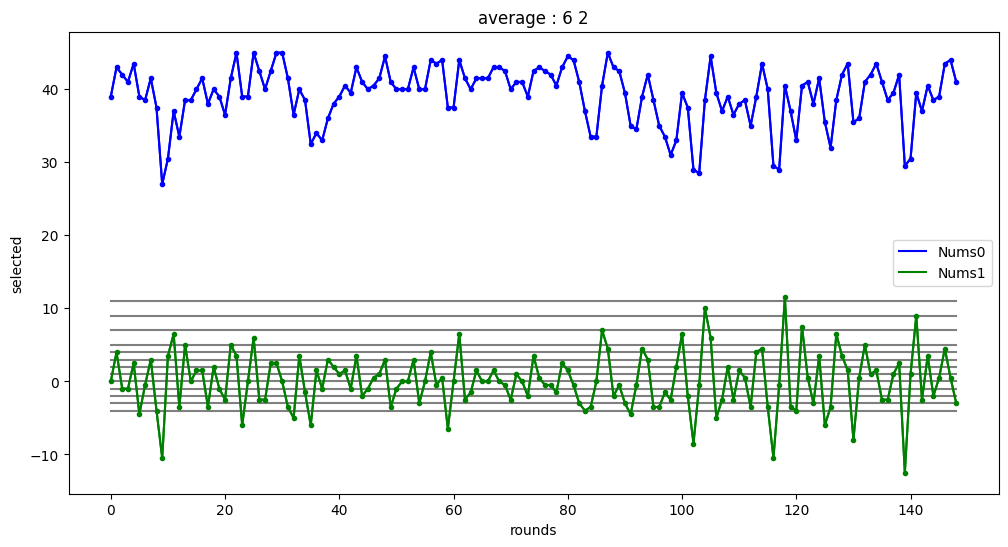

________________________________________
최소값          = [32.8, 33.0, 33.4, 33.8, 33.8]
마지막          = [39.0, 38.8, 40.6, 41.6, 40.8]


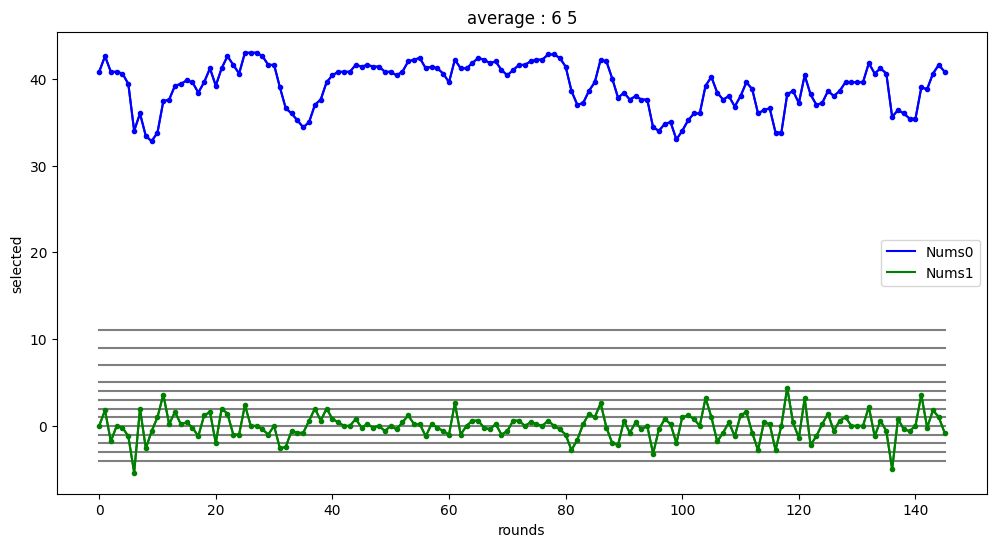

________________________________________
최소값          = [33.125, 33.625, 34.5, 35.0, 35.0]
마지막          = [37.0, 37.125, 37.375, 40.75, 40.0]


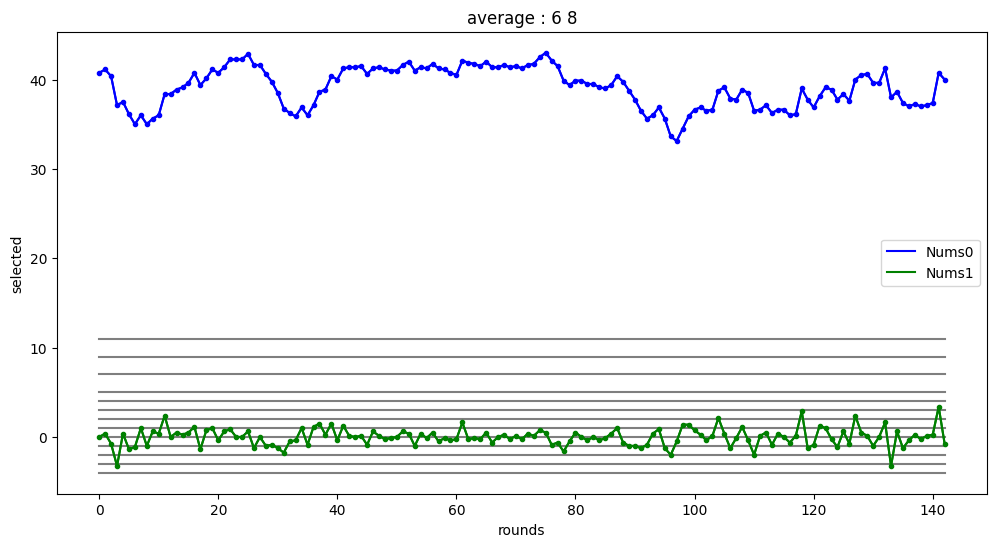

________________________________________
최소값          = [34.2, 34.6, 35.3, 35.4, 35.5]
마지막          = [37.3, 37.6, 38.3, 38.5, 38.1]


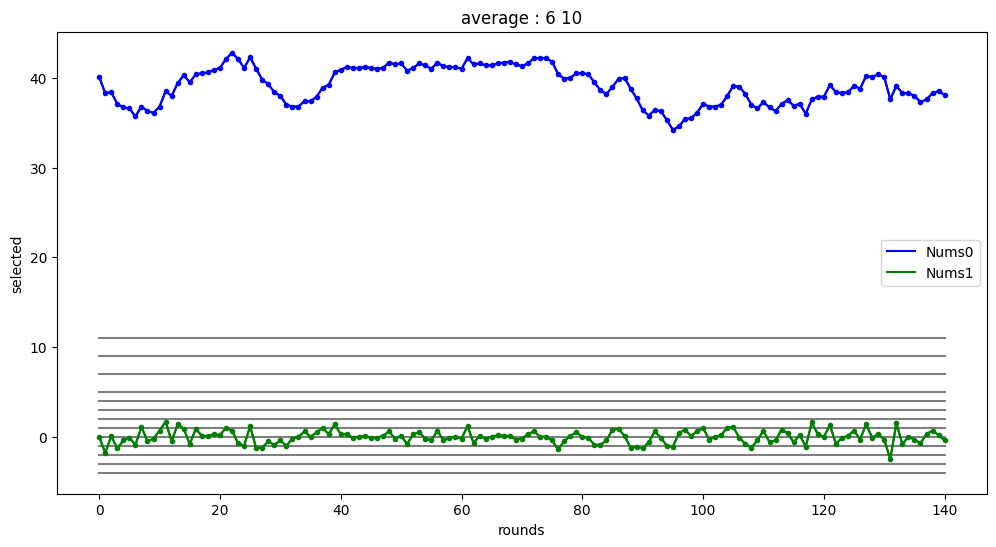

________________________________________
최소값          = [35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.76923076923077]
마지막          = [38.38461538461539, 38.69230769230769, 38.61538461538461, 38.76923076923077, 38.61538461538461]


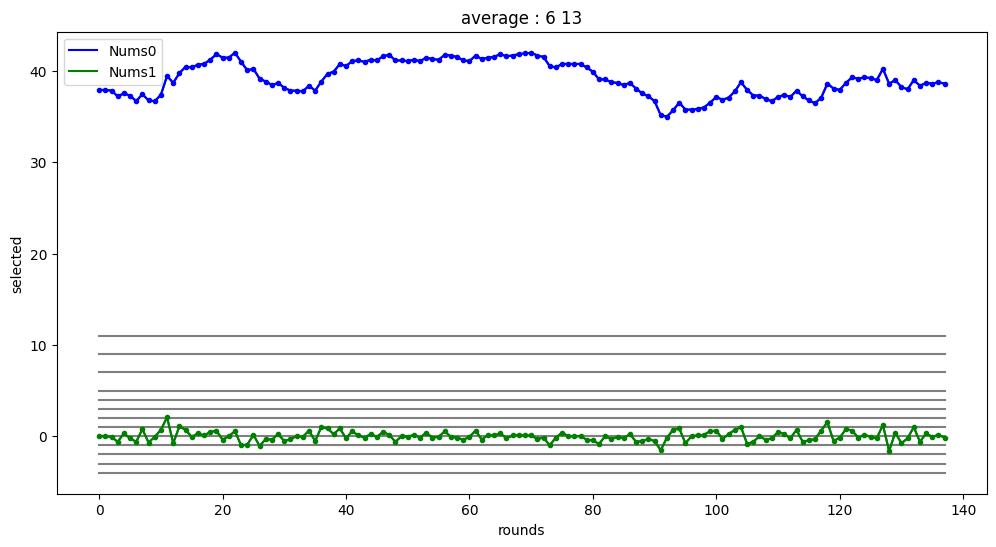

________________________________________
최소값          = [35.6, 35.6, 35.86666666666667, 36.13333333333333, 36.13333333333333]
마지막          = [38.06666666666667, 39.0, 39.06666666666667, 39.4, 38.93333333333333]


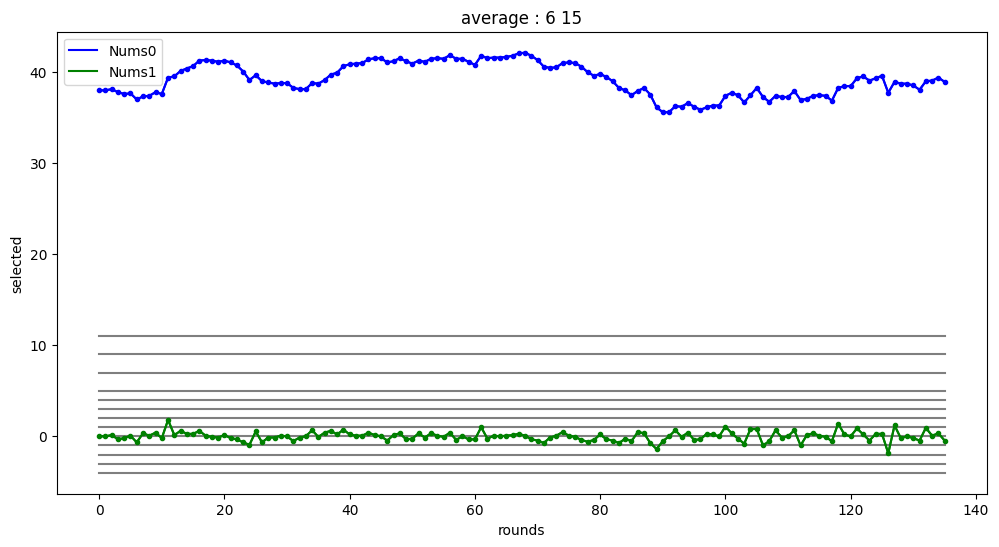

________________________________________
최소값          = [36.25, 36.3, 36.35, 36.55, 36.6]
마지막          = [38.05, 38.9, 39.2, 39.45, 39.1]


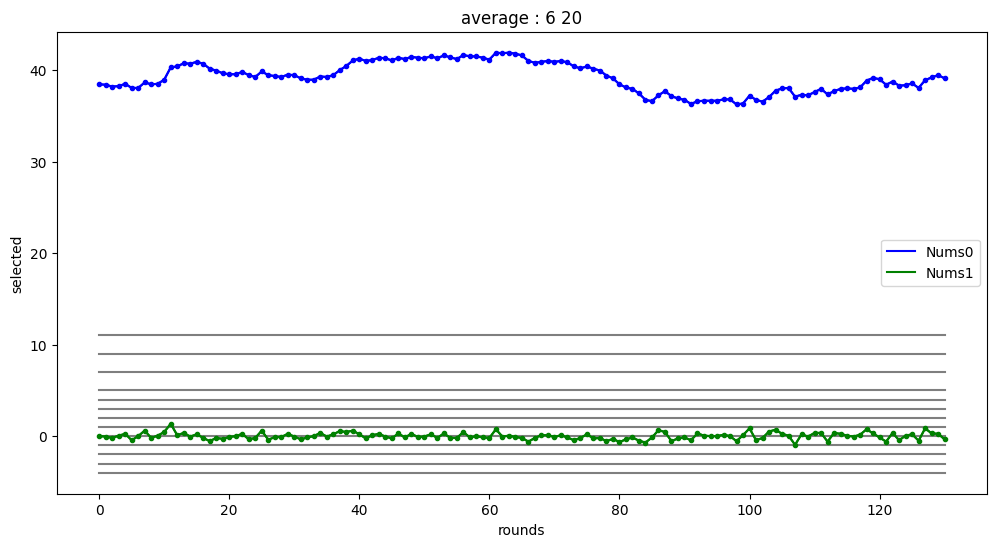

________________________________________
최소값          = [36.2, 36.2, 36.52, 36.6, 36.64]
마지막          = [38.52, 38.76, 38.76, 39.0, 39.0]


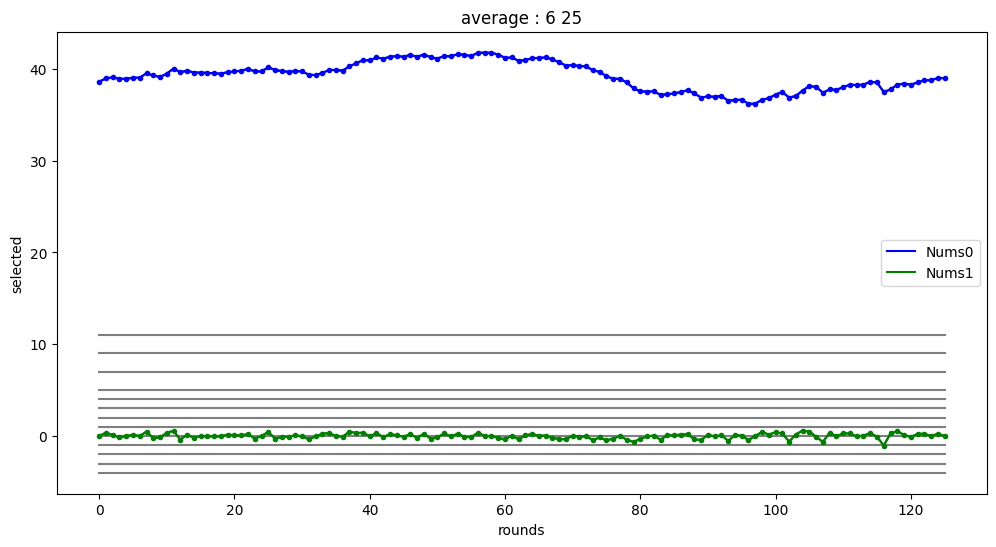

________________________________________
최소값          = [36.43333333333333, 36.5, 36.53333333333333, 36.7, 36.733333333333334]
마지막          = [37.733333333333334, 37.93333333333333, 38.666666666666664, 38.93333333333333, 38.7]


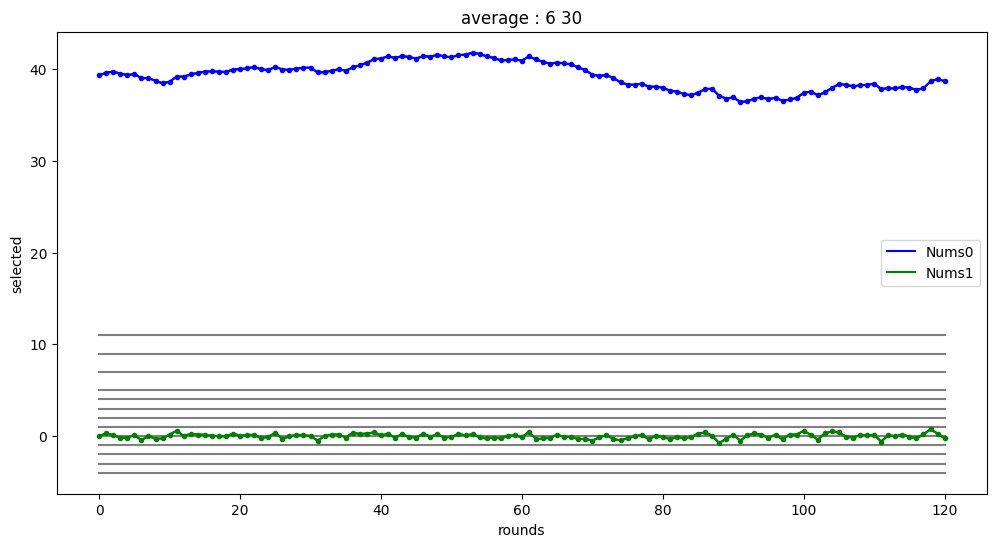

In [19]:
Round = 6
############################
selected = Round - 1
ext_data = 38
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 7, 8, 10, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 7, 9, 11]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
get_information(selected=selected,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

In [20]:
print(candidate)

{0: 1, 1: 16, 2: 22, 3: 23, 4: 34, 5: 38}


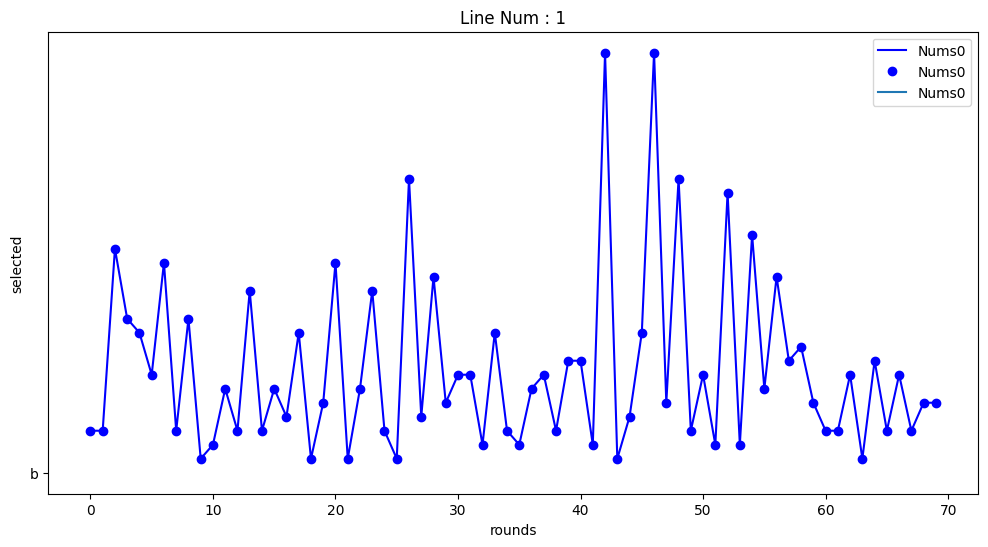

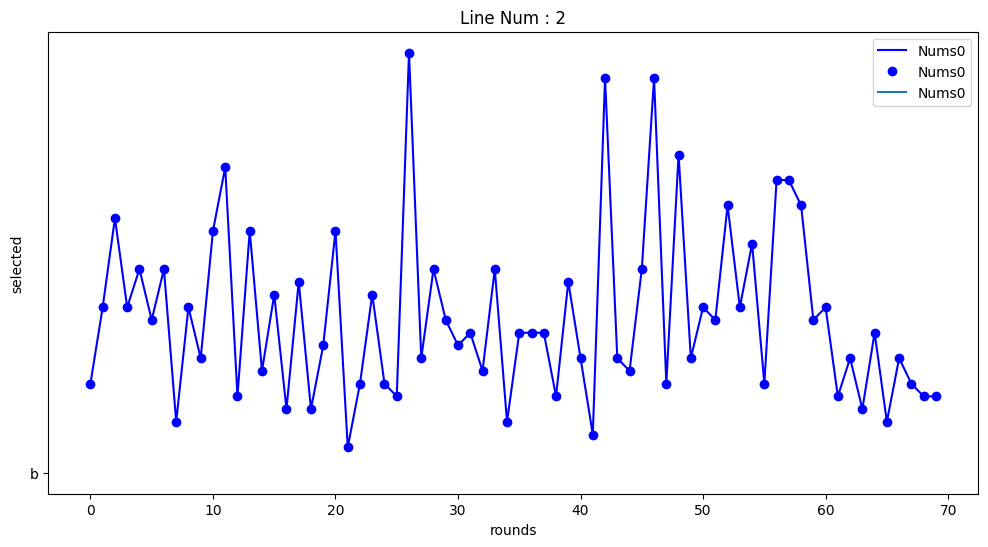

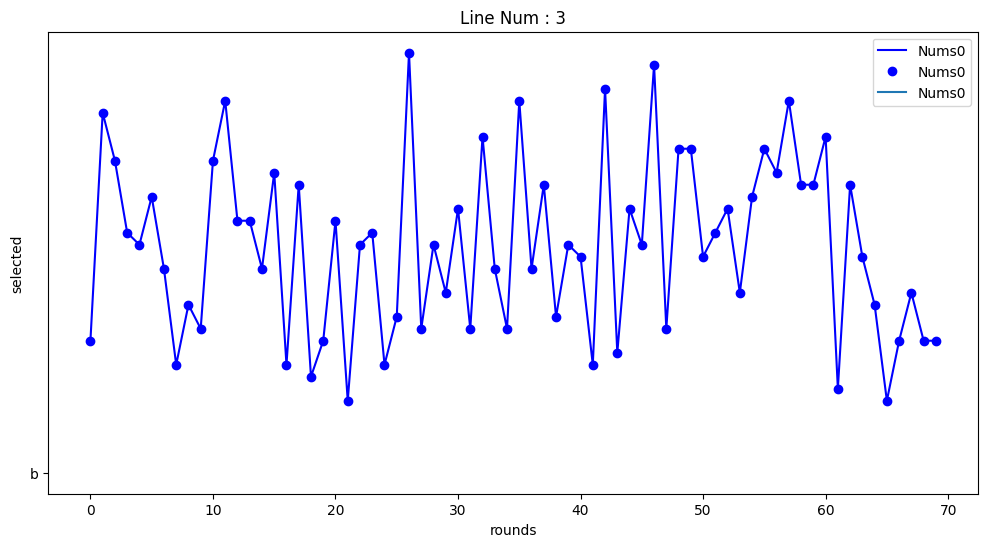

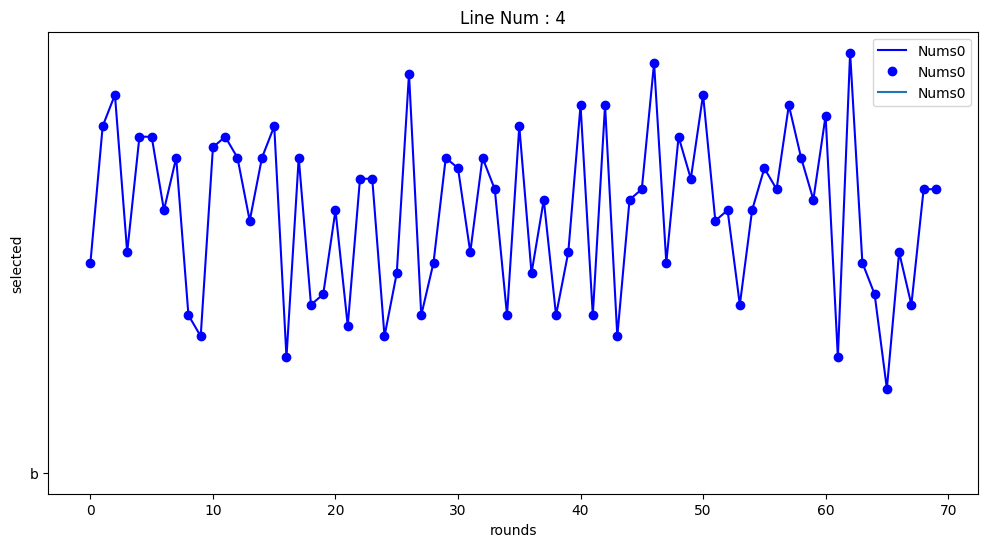

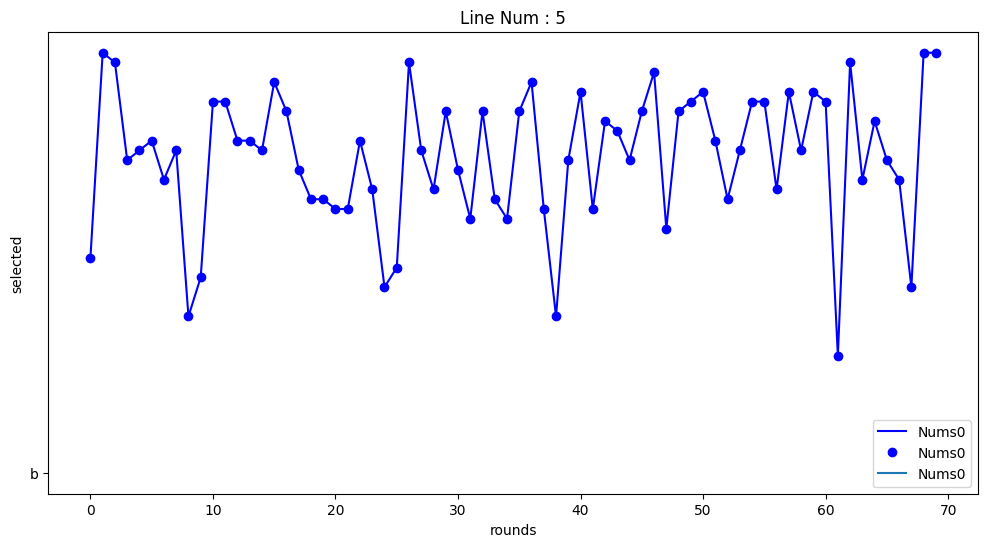

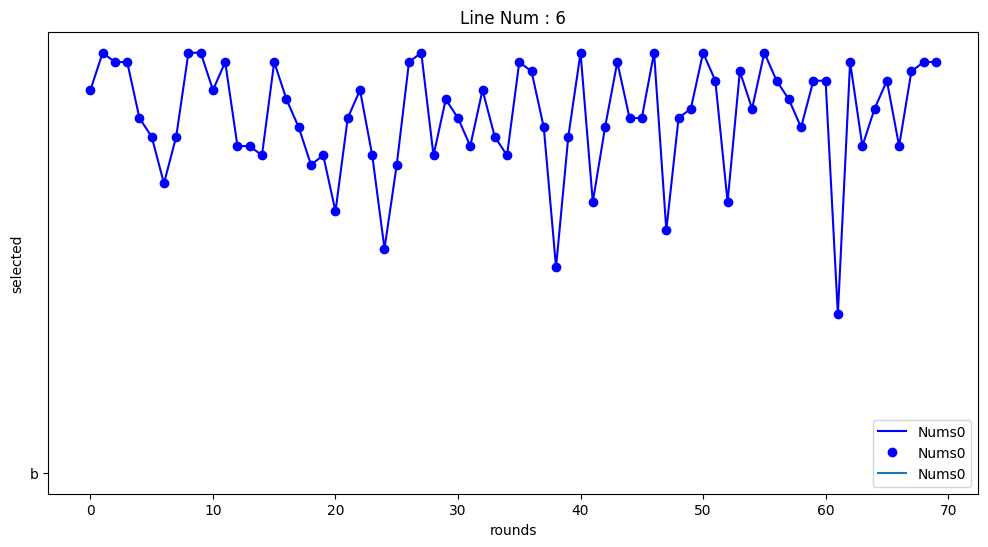

In [115]:
for i in range(6):
    draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')

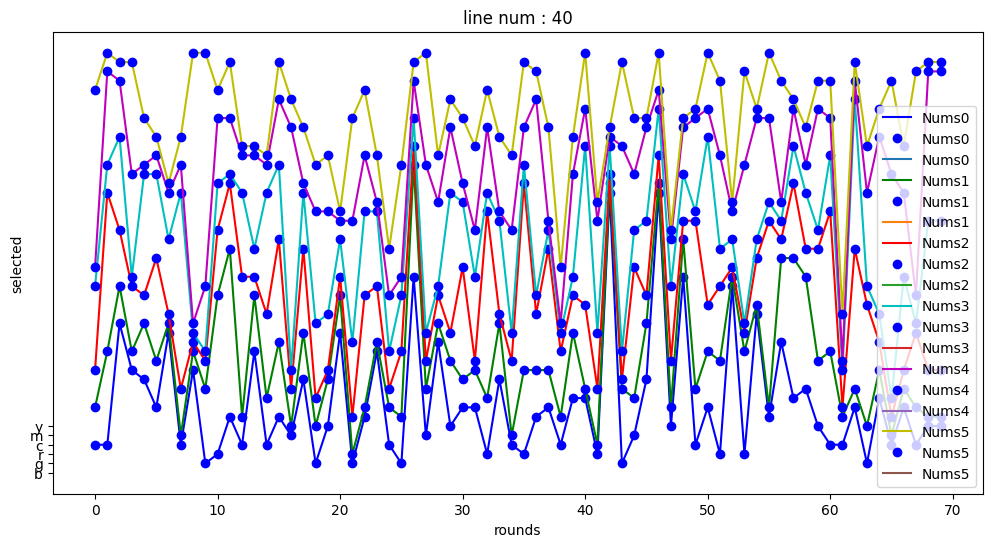

In [116]:
# for i in range(6):
#     draw_scatter([nums_by_row[i]], f'Line Num : {i+1}')
row_list = []
for nums in nums_by_row:
    row_list.append(nums)
draw_scatter(row_list, f'line num : {key}', True, True, [0,1,2,3,4,5])

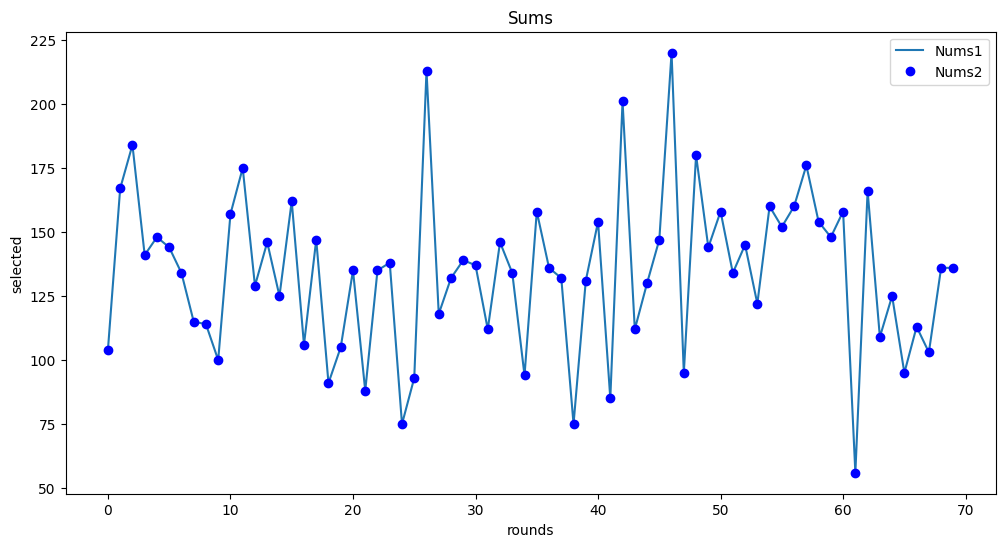

In [55]:
draw_scatter([sums], f'Sums')

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


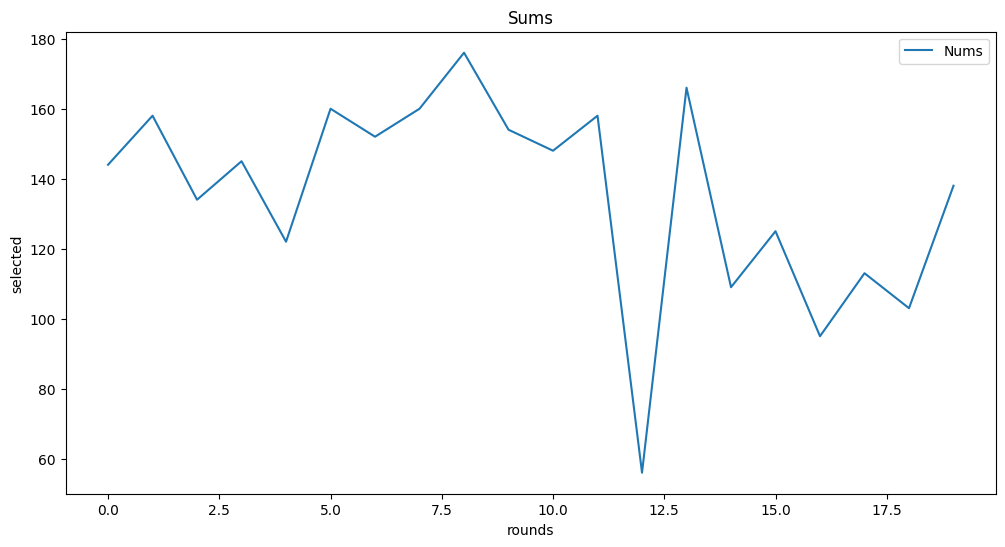

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))

In [52]:
candidate = """{0: 1, 1: 16, 2: 22, 3: 23, 4: 34, 5: 38}
{0: 8, 1: 16, 2: 18, 3: 19, 4: 30, 5: 33}
{0: 6, 1: 9, 2: 16, 3: 19, 4: 32, 5: 36}"""
rows = candidate.split("\n")
candidate_nums = []
for row in rows:
    cols = row.split(",")
    nums = []
    for col in cols:
        nums.append(col.split(": ")[1])
    candidate_nums.append(nums)

for candidate_num in candidate_nums:
    print(candidate_num)

['1', '16', '22', '23', '34', '38}']
['8', '16', '18', '19', '30', '33}']
['6', '9', '16', '19', '32', '36}']


In [56]:
for nums in nums_t[1:20]:
    print(nums)
# 1179 3,16,18,24,40,44+21. 

[5, 6, 11, 27, 43, 44]
[3, 7, 15, 16, 19, 43]
[7, 9, 11, 21, 30, 35]
[3, 4, 6, 8, 32, 42]
[8, 11, 14, 17, 36, 39]
[1, 5, 18, 20, 30, 35]
[7, 9, 24, 40, 42, 44]
[3, 6, 7, 11, 12, 17]
[3, 13, 28, 34, 38, 42]
[5, 12, 24, 26, 39, 42]
[9, 21, 24, 30, 33, 37]
[8, 23, 31, 35, 39, 40]
[14, 23, 25, 27, 29, 42]
[6, 7, 27, 29, 38, 45]
[17, 18, 23, 25, 38, 39]
[2, 13, 15, 16, 33, 43]
[20, 21, 22, 25, 28, 29]
[2, 12, 20, 24, 34, 42]
[7, 13, 18, 36, 39, 45]


In [ ]:
(np.float64(30.0), array([[7.3217187]], dtype=float32), 314558)
(np.float64(33.0), array([[13.810979]], dtype=float32), 314558)
(np.float64(35.0), array([[19.010557]], dtype=float32), 314558)
(np.float64(40.0), array([[25.239151]], dtype=float32), 314558)
(np.float64(44.0), array([[34.730366]], dtype=float32), 314558)
(np.float64(45.0), array([[38.54149]], dtype=float32), 314558)